**Authors:** Jozef Hanč, Martina Hančová <br> *[Faculty of Science](https://www.upjs.sk/en/faculty-of-science/?prefferedLang=EN), P. J. Šafárik University in Košice, Slovakia* <br> emails: [jozef.hanc@upjs.sk](mailto:jozef.hanc@upjs.sk)
***

# <font color = brown, size=6> Numerical inversion of ratio (Broda-Kan Approach) </font>

# <font color = brown>Numerical study - comparison of built-in vs. own algorithms

<font size=5> Computational tools: </font>  **<font size=5>MATLAB</font>** 


code `cf_Ratio_BK.m`   
code `cf_Ratio_BKB.m` 

---

**Section 3.2:** Broda-Kan inversion formula for ratio $T$ of independent RVs $X_1,X_2$
$$
f_T(x) = \frac{1}{\pi^2} \int_0^{+\infty} \int_{-\infty}^{+\infty} \Re\left\{\frac{\varphi_{X_1}(t_1)}{t_2} \varphi_{X_2}^{\prime}(-t_2 - x t_1)\right\} d t_1 d t_2.
$$

**Ref.** Hanč J., Hančová M., Borovský D., Probability distributions and calculations for Hake’s ratio statistics in measuring effect size, 
*preprint submitted to Statistical Papers*

----
`cf_Ratio_BK.m` calculates **BK** inversion char formula for the **ratio** PDF via fully vectorized double integral Rieman sum
$$
f_T(x) =
f\left(x_1, x_2=1\right)\approx\frac{1}{\pi^2} h_1 h_2 \sum_{v_1=-N}^{N} \sum_{v_2=0}^{N}  \Re\left\{ \varphi_{X_2}^{\prime}(- x_1 b_1 - x_2 b_2) \frac{\varphi_{X_1}(b_1)}{b_2}\right\}$$
$$b_1=h_1\left(v_1+0.5\right), b_2=h_2\left(v_2+0.5\right)$$

`cf_Ratio_BKB.m` calculates **BK** formula for the **ratio** PDF as the iterated integration via the **B**uilt-in 1D integrator (integral}
$$
f_T(x) = \frac{1}{\pi^2}  \int_{-\infty}^{+\infty}  \Re\left\{ \varphi_{X_1}(t_1)\int_0^{+\infty} 
\frac{\varphi_{X_2}'(-t_2 - x t_1)}{t_2} d t_2 \right\} d t_1
$$

---

# Numerical study - Hake ratio

For ratio of independent normal variables:  $T = X_1/X_2$

Numerator $ X_1 \sim N(a, 1), a = 1.5 $:
- CF: $ \varphi_{X_1}(t) = e^{i a t - \frac{t^2}{2}}$

Denominator $ X_2 \sim N(b, 1) $, $ b = 1 $\:
- CF: $ \varphi_{X_2}(t) = e^{i b t - \frac{t^2}{2}}$


In [1]:
% characteristic function of X1 ~ N(a,1)
a = 1.5;
cf1 = @(t1) exp(1i * a * t1 - t1.^2 / 2);

% characteristic function of X2 ~ N(b,1) and its derivative
b = 1;
cf2 = @(t2) exp(1i * b* t2 - t2.^2 / 2);
cf2_dif = @(t2) (1i*b - t2) .* exp(1i * b* t2 - t2.^2 / 2);

# Set of points x for PDF

In [2]:
% Define parameters
n = 4; % Number of iterations
dataFolder = "D:\Dropbox\00 Jupyter\00 Matematika\Probastat\data\MathematicaMATLAB\data\";

% Initialize maps
dx = containers.Map;
dsageQP = containers.Map;

% Loop to read data for 10^(n+1) points
for k = 1:n
    % Create the key as a string
    key = num2str(10^k);
    
    % Construct file paths
    xFilePath = sprintf('%sxvalues%d.txt', dataFolder, 10^k);
    sageQPFilePath = sprintf('%sSage_QPpdf%d.txt', dataFolder, 10^k);
    
    % Read the text files
    dx(key) = load(xFilePath, '-ascii'); % Using `-ascii` to read numerical text files
    dsageQP(key) = load(sageQPFilePath, '-ascii');
end

% Access data from dx or dsageQP using the key
format long;
disp('Data for 10 points:');
disp(dx('10')); % Accessing the data for the key '10', corresponding to k=0
disp(dsageQP('10')); % Accessing the data for the key '10', corresponding to k=0
format short; % Set back to default short format

Data for 10 points:
  -4.500000000000000
  -3.166666666666667
  -1.833333333333333
  -0.500000000000000
   0.833333333333333
   2.166666666666667
   3.500000000000000
   4.833333333333333
   6.166666666666667
   7.500000000000000

   0.010857191405375
   0.016964082520186
   0.027195141188685
   0.052692510471108
   0.363983717833685
   0.122015600892843
   0.045362568404555
   0.022301977251817
   0.013014648811622
   0.008464408087941



In [3]:
% set of points x
N = 1000;
x = dx(num2str(N));
SagePDF = dsageQP(num2str(N));

# PDF via the built-in 1D integrator
code `cf_Ratio_BKB.m` 

### BKB infinity lims + num. der. cf2

In [4]:
% setting options
clear options;
options.isPlot = true;
options.InfinityLimits = true;
%options.rtol=1e-3;
% options.xN = N;

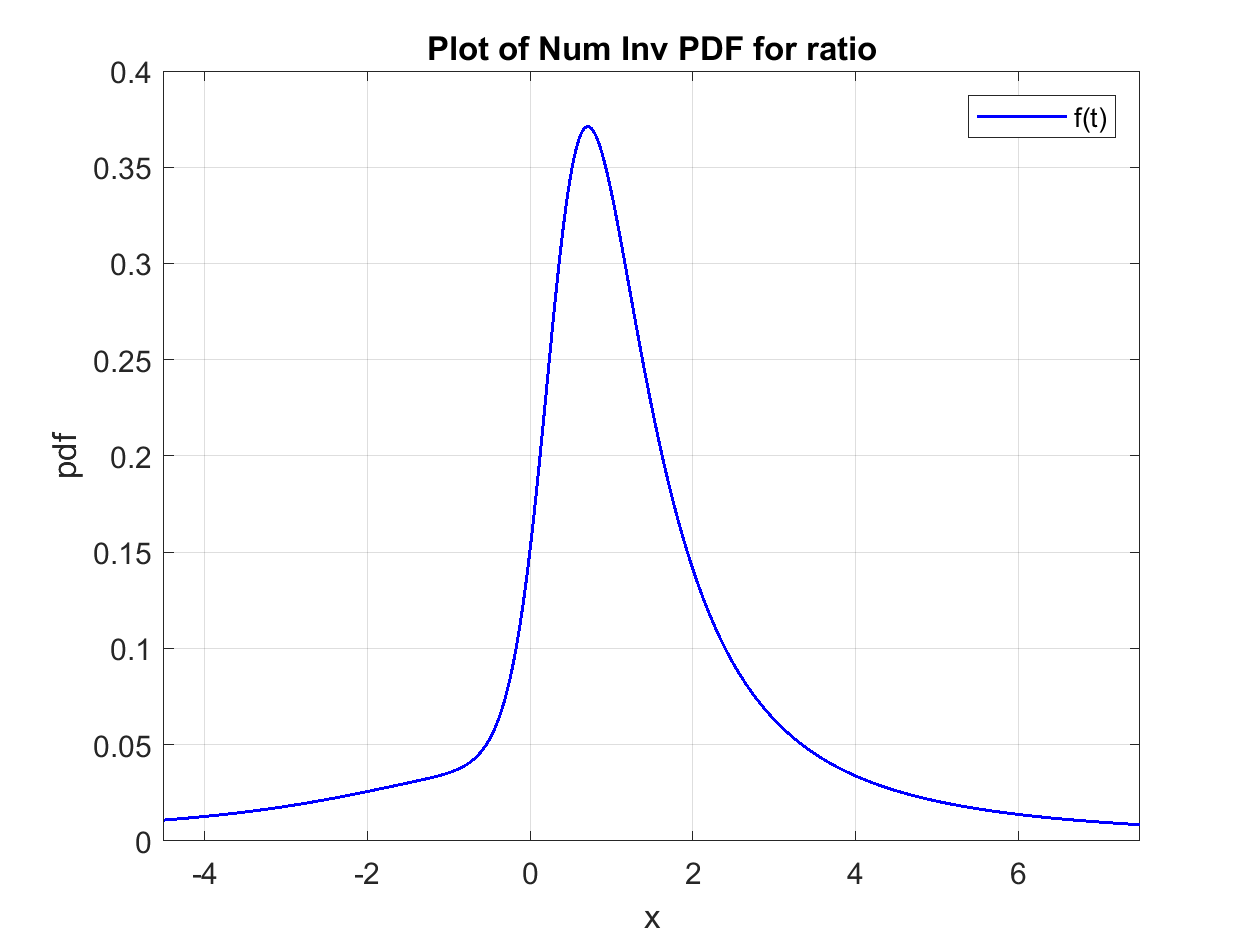

         Description: 'PDF of ratio X1/X2 from the char. functions'
     inversionMethod: 'Broda-Kan'
    quadratureMethod: 'Built-in 1D numerical integration https://www.mathworks.com/help/matlab/ref/integral.html'
          methodAbbr: 'BKB:Infs:NumDer:1e-03'
        parallelCPUs: 1
                 cf1: @(t1)exp(1i*a*t1-t1.^2/2)
                 cf2: @(t2)exp(1i*b*t2-t2.^2/2)
      cf2derSymbolic: []
                  xN: 1000
                   x: [1000x1 double]
                 pdf: [1000x1 double]
              t1_min: -Inf
              t1_max: Inf
              t2_min: 1.0000e-15
              t2_max: Inf
                rtol: 1.0000e-03
             options: [1x1 struct]
             runtime: 46.9776
     runtimePerPoint: 0.0470
               error: 6.0966e-08



In [6]:
% num inversion of ratio
[result, Rpdf] = cf_Ratio_BKB(cf1, cf2, x, options);
result.error = max(abs(Rpdf-SagePDF));
disp(result)

#### measuring runtime

In [7]:
% Initialize the structure to store performance data for methods
performance.method = {}; % method of calculation
performance.rt = []; % runtime
performance.rtPerPoint = []; % runtime per point
performance.acceleration = []; % acceleration
performance.error = []; % max error

In [8]:
% simple tic-toc method built-in the cf_Ratio_BKB.m
% Update the performance structure and display the result
performance = update_PerfStats(result, performance);

                     Performance statistics  
                    _________________________

    method          {'BKB:Infs:NumDer:1e-03'}
    rt              {'[4.70e+01]'           }
    rtPerPoint      {'[4.70e-02]'           }
    acceleration    {'[1.00e+00]'           }
    error           {'[6.10e-08]'           }



### BKB infinity lims + symb. der. cf2

In [9]:
% using symbolic derivative
options.cf2derSymbolic = cf2_dif;

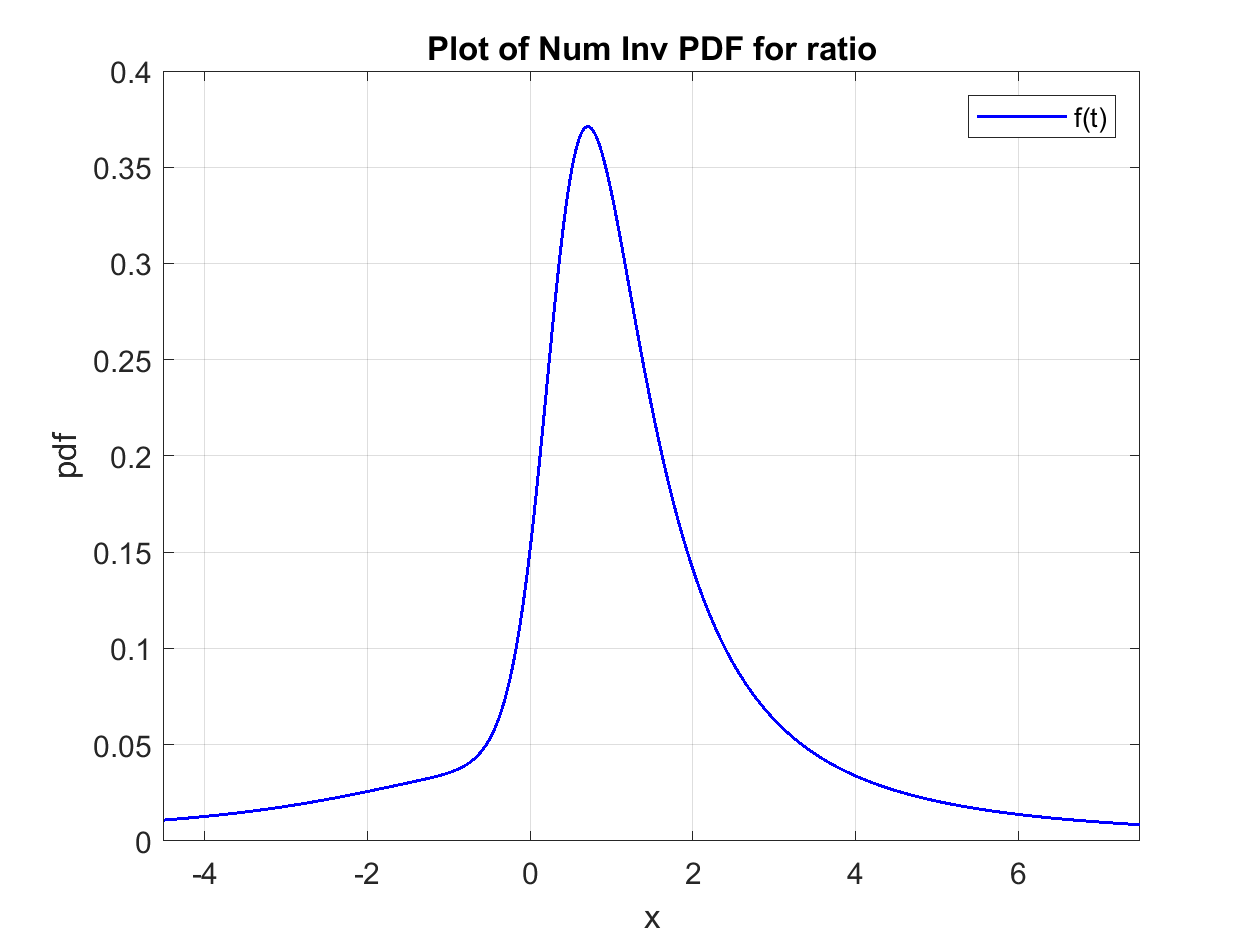

         Description: 'PDF of ratio X1/X2 from the char. functions'
     inversionMethod: 'Broda-Kan'
    quadratureMethod: 'Built-in 1D numerical integration https://www.mathworks.com/help/matlab/ref/integral.html'
          methodAbbr: 'BKB:Infs:SymDer:1e-03'
        parallelCPUs: 1
                 cf1: @(t1)exp(1i*a*t1-t1.^2/2)
                 cf2: @(t2)exp(1i*b*t2-t2.^2/2)
      cf2derSymbolic: @(t2)(1i*b-t2).*exp(1i*b*t2-t2.^2/2)
                  xN: 1000
                   x: [1000x1 double]
                 pdf: [1000x1 double]
              t1_min: -Inf
              t1_max: Inf
              t2_min: 1.0000e-15
              t2_max: Inf
                rtol: 1.0000e-03
             options: [1x1 struct]
             runtime: 16.0446
     runtimePerPoint: 0.0160
               error: 6.0966e-08



In [10]:
% num inversion of ratio
[result, Rpdfs] = cf_Ratio_BKB(cf1, cf2, x, options);
result.error = max(abs(Rpdf-SagePDF));
disp(result)

#### measuring runtime

In [11]:
% simple tic-toc method built-in the cf_Ratio_BKB.m
% Update the performance structure and display the result
performance = update_PerfStats(result, performance);

                                  Performance statistics              
                    __________________________________________________

    method          {'[BKB:Infs:NumDer:1e-03, BKB:Infs:SymDer:1e-03]'}
    rt              {'[4.70e+01 1.60e+01]'                           }
    rtPerPoint      {'[4.70e-02 1.60e-02]'                           }
    acceleration    {'[1.00e+00 2.93e+00]'                           }
    error           {'[6.10e-08 6.10e-08]'                           }



### BKB infinity lims + symb.der cf2

In [12]:
disp(options)

            isPlot: 1
    InfinityLimits: 1
    cf2derSymbolic: @(t2)(1i*b-t2).*exp(1i*b*t2-t2.^2/2)



In [46]:
options.isInterp = true;
%options.chebyPts = 2^7+1;
options.rtol = 1e-5;

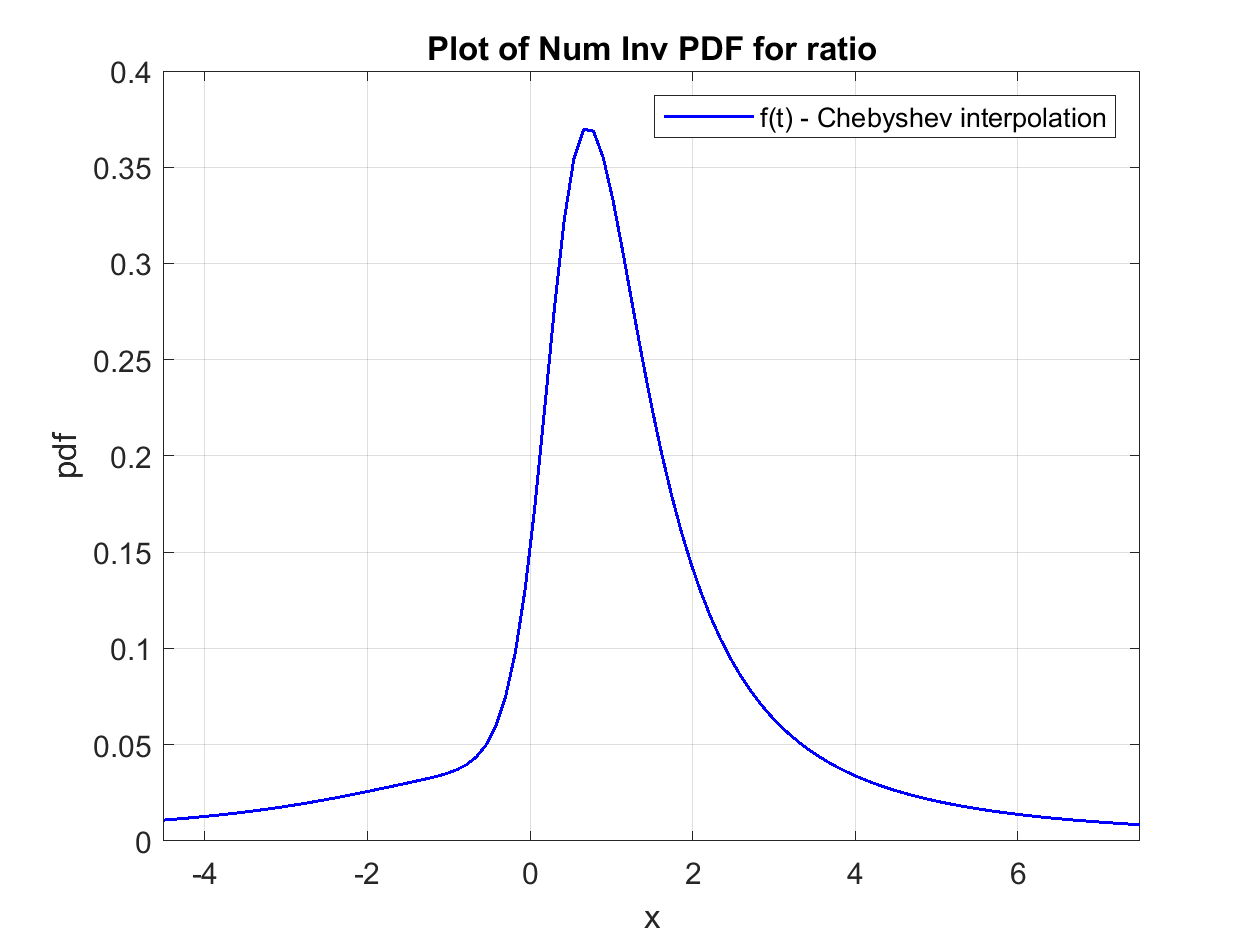

         Description: 'PDF of ratio X1/X2 from the char. functions'
     inversionMethod: 'Broda-Kan'
    quadratureMethod: 'Built-in 1D numerical integration with Chebyshev interpolation https://www.mathworks.com/help/matlab/ref/integral.html'
          methodAbbr: 'BKB:CC129:Infs:SymDer:1e-05'
        parallelCPUs: 1
                 cf1: @(t1)exp(1i*a*t1-t1.^2/2)
                 cf2: @(t2)exp(1i*b*t2-t2.^2/2)
      cf2derSymbolic: @(t2)(1i*b-t2).*exp(1i*b*t2-t2.^2/2)
                  xN: 129
                   x: [-4.5008 -4.4989 -4.4935 -4.4845 -4.4719 -4.4556 -4.4358 -4.4124 -4.3855 -4.3550 -4.3209 -4.2834 -4.2424 -4.1979 -4.1500 -4.0987 -4.0440 -3.9859 ... ] (1x129 double)
                 pdf: [0.0109 0.0109 0.0109 0.0109 0.0110 0.0110 0.0111 0.0112 0.0113 0.0114 0.0115 0.0116 0.0118 0.0119 0.0121 0.0123 0.0126 0.0128 0.0131 0.0133 0.0137 ... ] (1x129 double)
                 PDF: @(x1new)InterpPDF(x1new,x1,Rpdf)
              t1_min: -Inf
              t1_max: Inf
           

In [47]:
% num inversion of ratio
[result, Rpdf] = cf_Ratio_BKB(cf1, cf2, [], options);
%result.error = max(abs(Rpdf-SagePDF));
disp(result)

In [48]:
%calculation Chebyshev interpolation
runtime = result.runtime;

timeVal = tic;
Rpdfc = result.PDF(x);
tictoc = toc(timeVal);
result.runtime = runtime + tictoc;
result.error = max(abs(Rpdfc-SagePDF));
result.xN = N;

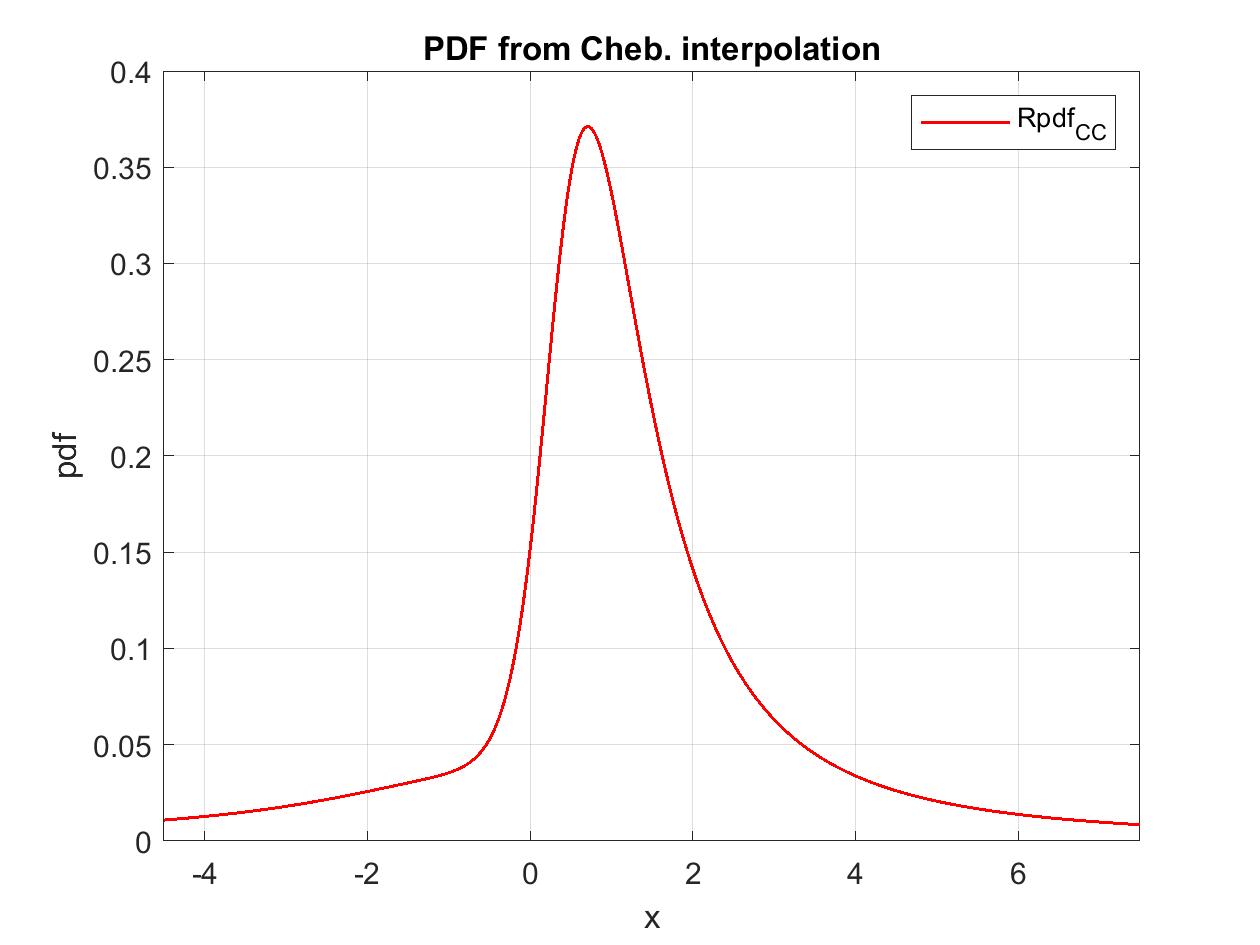

In [49]:
%PDF from Cheb interpolation vs. from Cheb points
figure
plot(x, Rpdfc, 'r', 'LineWidth', 1);
xlim([min(x) max(x)]) % plot in  sigma range
grid on;
title('PDF from Cheb. interpolation')
xlabel('x')
ylabel('pdf')   
legend('Rpdf_C_C');

#### measuring time

In [50]:
% simple tic-toc method 
% Update the performance structure and display the result
performance = update_PerfStats(result, performance);

                                                                                                                                Performance statistics                                                                                                            
                    ______________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

    method          {'[BKB:Infs:NumDer:1e-03, BKB:Infs:SymDer:1e-03, BKB:CC:Infs:SymDer:1e-03, BKB:CC:Infs:SymDer:1e-08, BKB:CC:Infs:SymDer:1e-10, BKB:CC:Infs:SymDer:1e-10, BKB:CC:Infs:SymDer:1e-06, BKB:CC129:Infs:SymDer:1e-04, BKB:CC129:Infs:SymDer:1e-05]'}
    rt              {'[4.70e+01 1.60e+01 1.14e+00 4.00e+00 6.89e+00 1.35e+01 3.83e+00 2.46e+00 2.88e+00]'                                                                                                                     

### BKB sixsigma lims + num.der cf2

In [11]:
% integration over sixsigma interval
options.cf2derSymbolic = [];
options.InfinityLimits=false;

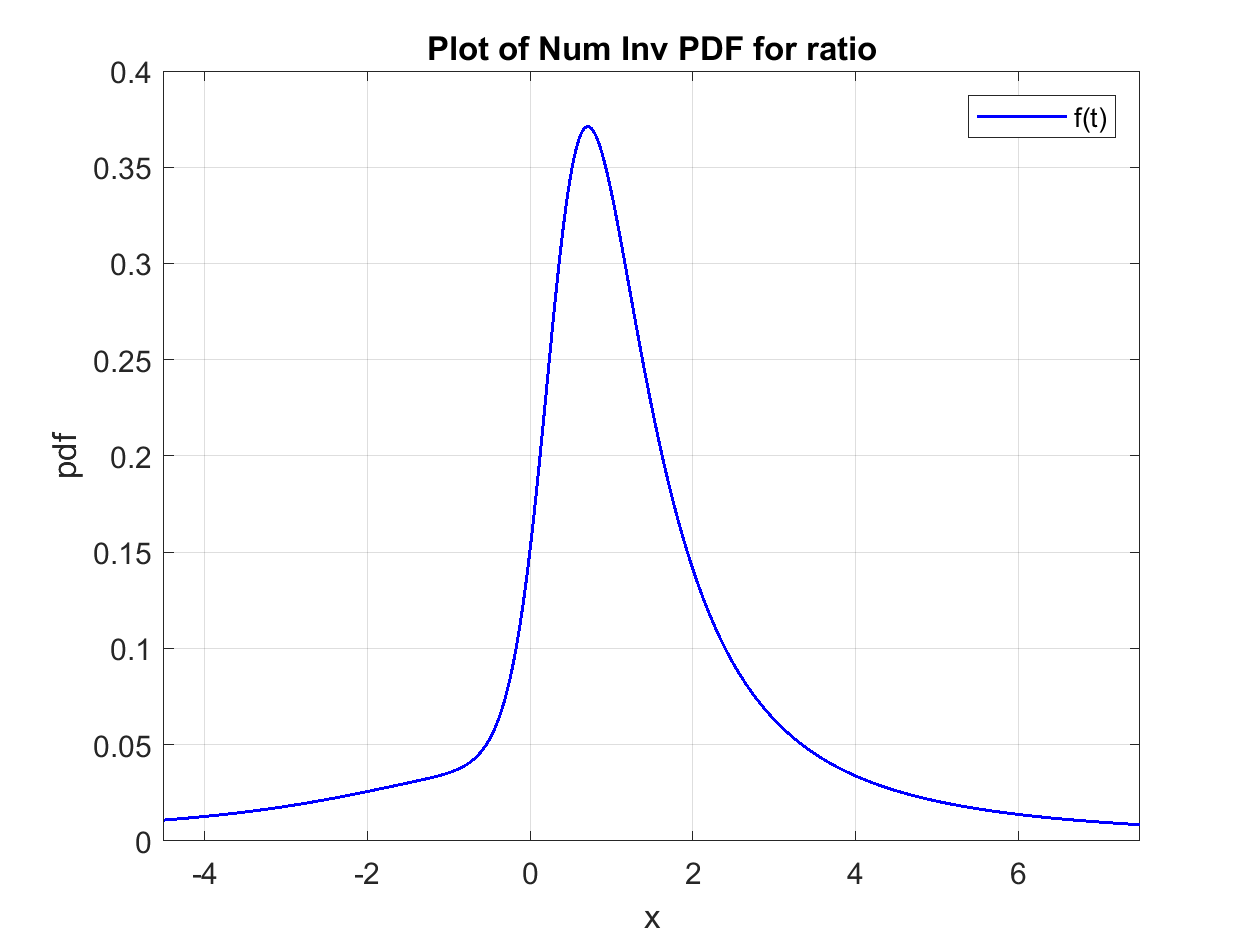

         Description: 'PDF of ratio X1/X2 from the char. functions'
     inversionMethod: 'Broda-Kan'
    quadratureMethod: 'Built-in 1D numerical integration https://www.mathworks.com/help/matlab/ref/integral.html'
          methodAbbr: 'BKB:SixSigma:NumDer:1e-03'
        parallelCPUs: 1
                 cf1: @(t1)exp(1i*a*t1-t1.^2/2)
                 cf2: @(t2)exp(1i*b*t2-t2.^2/2)
      cf2derSymbolic: []
                  xN: 1000
                   x: [1000x1 double]
                 pdf: [1000x1 double]
        SixSigmaRule: 6
                   N: 256
              t1_min: -44.5875
              t1_max: 44.7621
              t2_min: 1.0000e-15
              t2_max: 44.7566
                rtol: 1.0000e-03
             options: [1x1 struct]
             runtime: 60.6039
     runtimePerPoint: 0.0606
               error: 1.4520e-08



In [12]:
[result, Rpdf] = cf_Ratio_BKB(cf1, cf2, x, options);
result.error = max(abs(Rpdf-SagePDF));
disp(result)

#### measuring runtime

In [13]:
% simple tic-toc method built-in the cf_Ratio_BKB.m
% Update the performance structure and display the result
performance = update_PerfStats(result, performance);

                                               Performance statistics                            
                    _____________________________________________________________________________

    method          {'[BKB:Infs:NumDer:1e-03, BKB:Infs:SymDer:1e-03, BKB:SixSigma:NumDer:1e-03]'}
    rt              {'[4.45e+01 1.52e+01 6.06e+01]'                                             }
    rtPerPoint      {'[4.45e-02 1.52e-02 6.06e-02]'                                             }
    acceleration    {'[1.00e+00 2.94e+00 7.35e-01]'                                             }
    error           {'[6.10e-08 6.10e-08 1.45e-08]'                                             }



### BKB sixsigma lims + symb. der. cf2

In [14]:
% using symbolic derivative
options.cf2derSymbolic = cf2_dif;

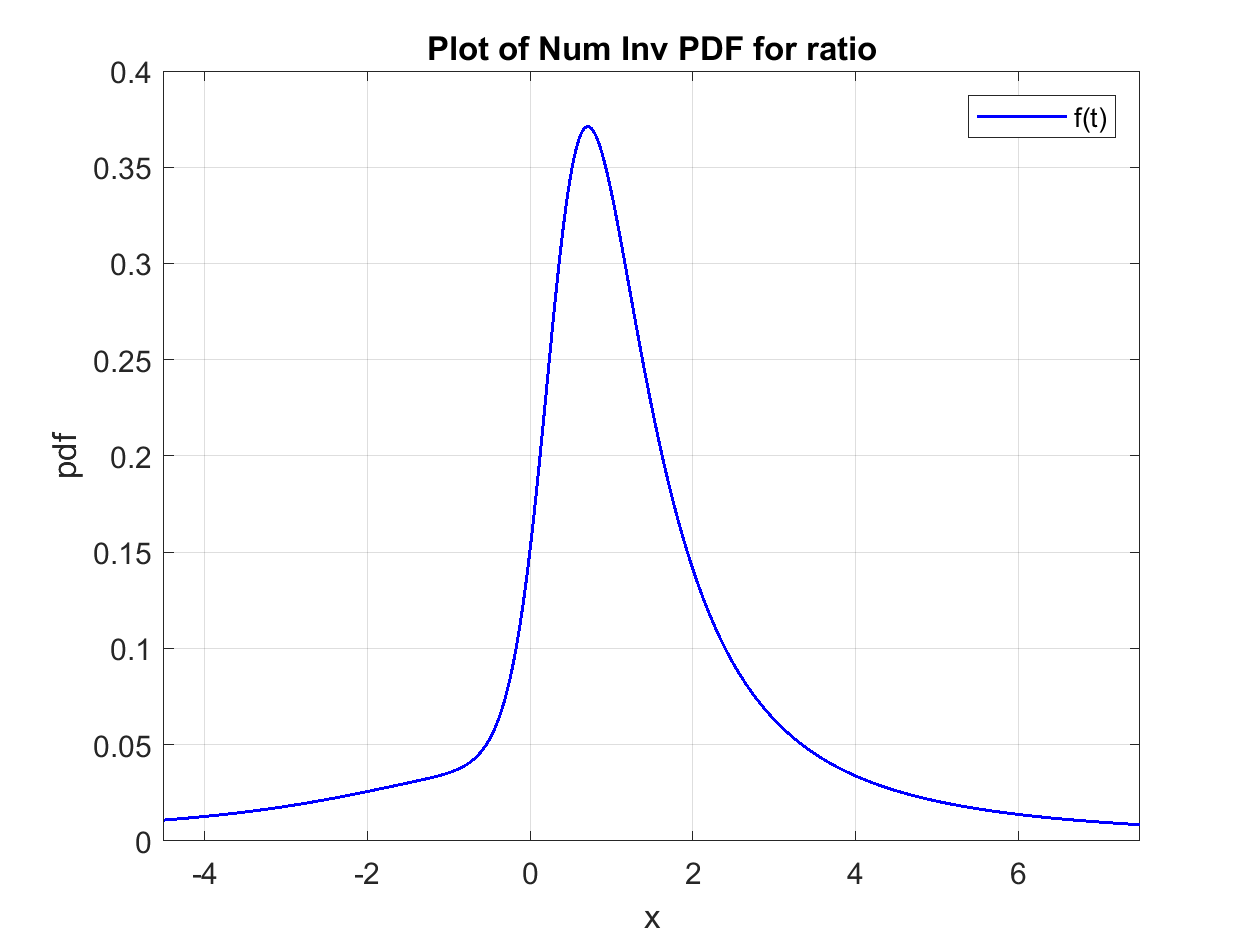

         Description: 'PDF of ratio X1/X2 from the char. functions'
     inversionMethod: 'Broda-Kan'
    quadratureMethod: 'Built-in 1D numerical integration https://www.mathworks.com/help/matlab/ref/integral.html'
          methodAbbr: 'BKB:SixSigma:SymDer:1e-03'
        parallelCPUs: 1
                 cf1: @(t1)exp(1i*a*t1-t1.^2/2)
                 cf2: @(t2)exp(1i*b*t2-t2.^2/2)
      cf2derSymbolic: @(t2)(1i*b-t2).*exp(1i*b*t2-t2.^2/2)
                  xN: 1000
                   x: [1000x1 double]
                 pdf: [1000x1 double]
        SixSigmaRule: 6
                   N: 256
              t1_min: -44.5875
              t1_max: 44.7621
              t2_min: 1.0000e-15
              t2_max: 44.7566
                rtol: 1.0000e-03
             options: [1x1 struct]
             runtime: 22.9991
     runtimePerPoint: 0.0230
               error: 1.4520e-08



In [15]:
% num inversion of ratio
[result, Rpdfs] = cf_Ratio_BKB(cf1, cf2, x, options);
result.error = max(abs(Rpdf-SagePDF));
disp(result)

#### measuring runtime

In [16]:
% simple tic-toc method built-in the cf_Ratio_BKB.m
% Update the performance structure and display the result
performance = update_PerfStats(result, performance);

                                                             Performance statistics                                         
                    ________________________________________________________________________________________________________

    method          {'[BKB:Infs:NumDer:1e-03, BKB:Infs:SymDer:1e-03, BKB:SixSigma:NumDer:1e-03, BKB:SixSigma:SymDer:1e-03]'}
    rt              {'[4.45e+01 1.52e+01 6.06e+01 2.30e+01]'                                                               }
    rtPerPoint      {'[4.45e-02 1.52e-02 6.06e-02 2.30e-02]'                                                               }
    acceleration    {'[1.00e+00 2.94e+00 7.35e-01 1.94e+00]'                                                               }
    error           {'[6.10e-08 6.10e-08 1.45e-08 1.45e-08]'                                                               }



# Parallel CPU calculation

In [17]:
%using parallelization
clear options;
options.parallelCPU = true;

### BKBP infinity lims + num. der. cf2

In [18]:
% setting options
options.isPlot = true;
options.InfinityLimits = true;
% options.xN = N;

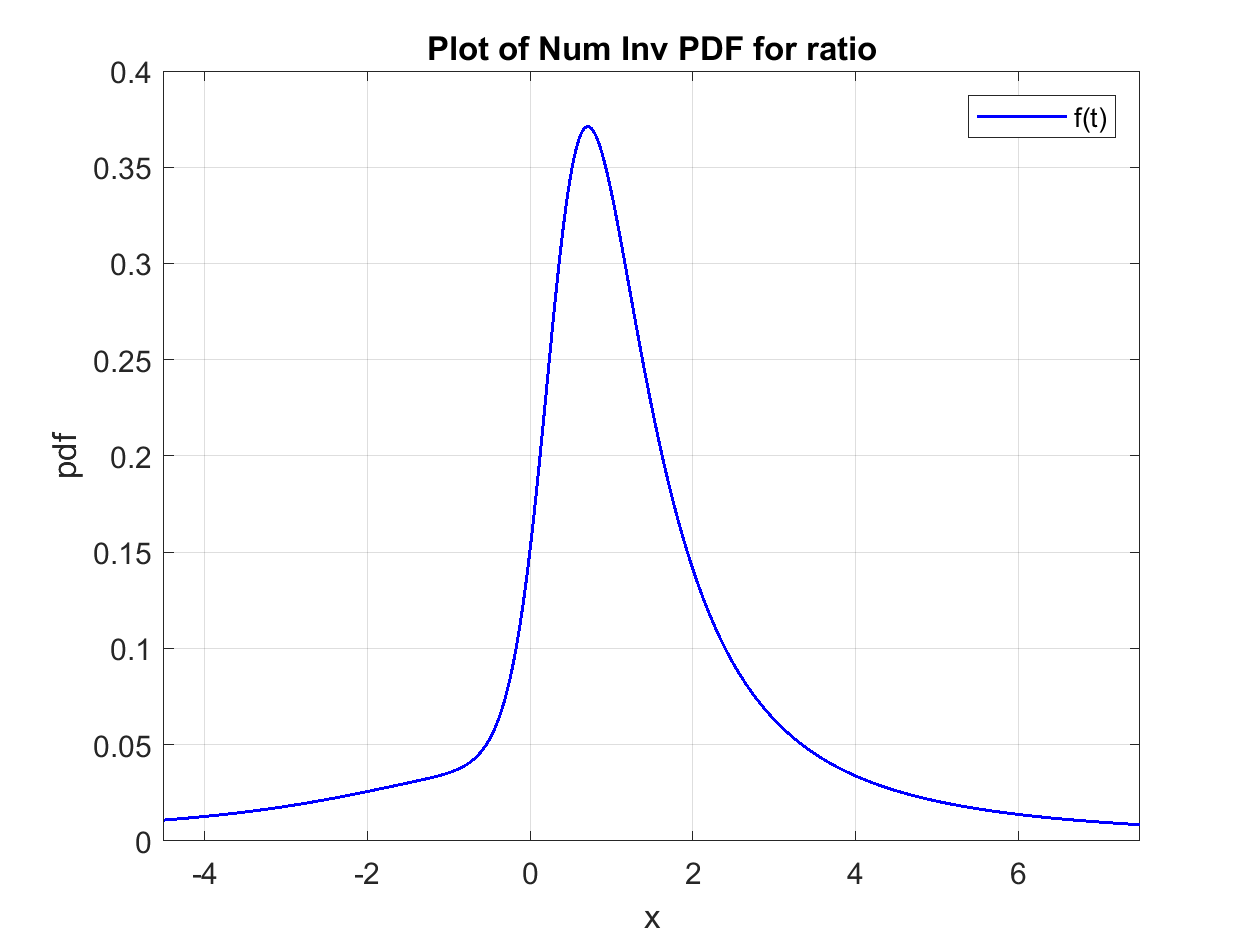

         Description: 'PDF of ratio X1/X2 from the char. functions'
     inversionMethod: 'Broda-Kan'
    quadratureMethod: 'Built-in 1D numerical integration https://www.mathworks.com/help/matlab/ref/integral.html'
          methodAbbr: 'BKB:Infs:NumDer:parCPU:1e-03'
        parallelCPUs: 8
                 cf1: @(t1)exp(1i*a*t1-t1.^2/2)
                 cf2: @(t2)exp(1i*b*t2-t2.^2/2)
      cf2derSymbolic: []
                  xN: 1000
                   x: [1000x1 double]
                 pdf: [1000x1 double]
              t1_min: -Inf
              t1_max: Inf
              t2_min: 1.0000e-15
              t2_max: Inf
                rtol: 1.0000e-03
             options: [1x1 struct]
             runtime: 7.4482
     runtimePerPoint: 0.0074
               error: 1.4520e-08



In [19]:
% num inversion of ratio
[result, Rpdfs] = cf_Ratio_BKB(cf1, cf2, x, options);
result.error = max(abs(Rpdf-SagePDF));
disp(result)

#### measuring runtime

In [20]:
% simple tic-toc method built-in the cf_Ratio_BKB.m
% Update the performance structure and display the result
performance = update_PerfStats(result, performance);

                                                                            Performance statistics                                                        
                    ______________________________________________________________________________________________________________________________________

    method          {'[BKB:Infs:NumDer:1e-03, BKB:Infs:SymDer:1e-03, BKB:SixSigma:NumDer:1e-03, BKB:SixSigma:SymDer:1e-03, BKB:Infs:NumDer:parCPU:1e-03]'}
    rt              {'[4.45e+01 1.52e+01 6.06e+01 2.30e+01 7.45e+00]'                                                                                    }
    rtPerPoint      {'[4.45e-02 1.52e-02 6.06e-02 2.30e-02 7.45e-03]'                                                                                    }
    acceleration    {'[1.00e+00 2.94e+00 7.35e-01 1.94e+00 5.98e+00]'                                                                                    }
    error           {'[6.10e-08 6.10e-08 1.45e-08 1.45e-08 1.45e-08]'

### BKBP infinity lims + symb. der. cf2

In [21]:
% using symbolic derivative
options.cf2derSymbolic = cf2_dif;

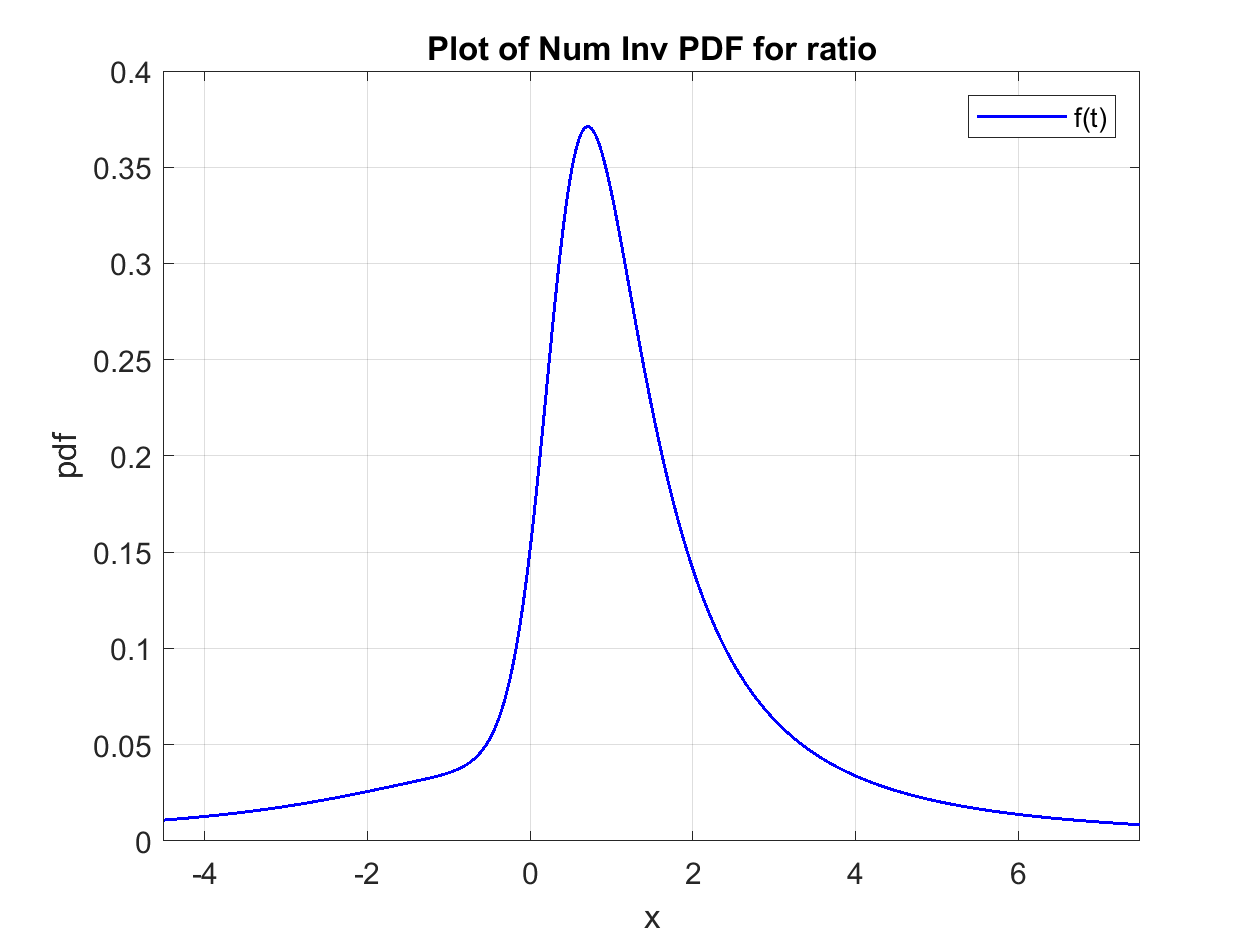

         Description: 'PDF of ratio X1/X2 from the char. functions'
     inversionMethod: 'Broda-Kan'
    quadratureMethod: 'Built-in 1D numerical integration https://www.mathworks.com/help/matlab/ref/integral.html'
          methodAbbr: 'BKB:Infs:SymDer:parCPU:1e-03'
        parallelCPUs: 8
                 cf1: @(t1)exp(1i*a*t1-t1.^2/2)
                 cf2: @(t2)exp(1i*b*t2-t2.^2/2)
      cf2derSymbolic: @(t2)(1i*b-t2).*exp(1i*b*t2-t2.^2/2)
                  xN: 1000
                   x: [1000x1 double]
                 pdf: [1000x1 double]
              t1_min: -Inf
              t1_max: Inf
              t2_min: 1.0000e-15
              t2_max: Inf
                rtol: 1.0000e-03
             options: [1x1 struct]
             runtime: 2.4450
     runtimePerPoint: 0.0024
               error: 1.4520e-08



In [22]:
% num inversion of ratio
[result, Rpdfs] = cf_Ratio_BKB(cf1, cf2, x, options);
result.error = max(abs(Rpdf-SagePDF));
disp(result)

#### measuring runtime

In [23]:
% simple tic-toc method built-in the cf_Ratio_BKB.m
% Update the performance structure and display the result
performance = update_PerfStats(result, performance);

                                                                                           Performance statistics                                                                       
                    ____________________________________________________________________________________________________________________________________________________________________

    method          {'[BKB:Infs:NumDer:1e-03, BKB:Infs:SymDer:1e-03, BKB:SixSigma:NumDer:1e-03, BKB:SixSigma:SymDer:1e-03, BKB:Infs:NumDer:parCPU:1e-03, BKB:Infs:SymDer:parCPU:1e-03]'}
    rt              {'[4.45e+01 1.52e+01 6.06e+01 2.30e+01 7.45e+00 2.45e+00]'                                                                                                         }
    rtPerPoint      {'[4.45e-02 1.52e-02 6.06e-02 2.30e-02 7.45e-03 2.45e-03]'                                                                                                         }
    acceleration    {'[1.00e+00 2.94e+00 7.35e-01 1.94e+00 5.98e+00 1.82e+

### BKBP sixsigma lims + num.der cf2

In [24]:
% integration over sixsigma interval
options.cf2derSymbolic = [];
options.InfinityLimits=false;

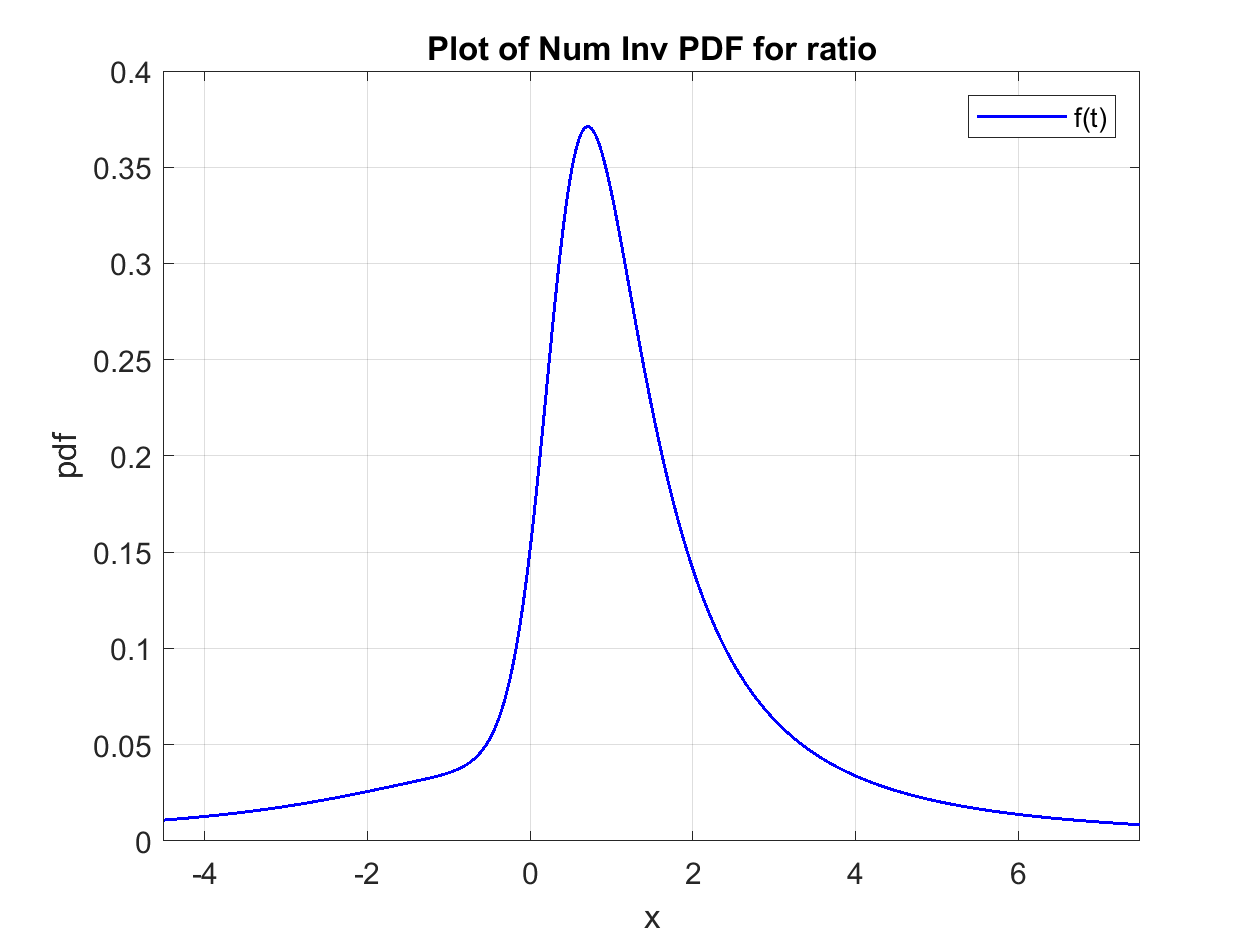

         Description: 'PDF of ratio X1/X2 from the char. functions'
     inversionMethod: 'Broda-Kan'
    quadratureMethod: 'Built-in 1D numerical integration https://www.mathworks.com/help/matlab/ref/integral.html'
          methodAbbr: 'BKB:SixSigma:NumDer:parCPU:1e-03'
        parallelCPUs: 8
                 cf1: @(t1)exp(1i*a*t1-t1.^2/2)
                 cf2: @(t2)exp(1i*b*t2-t2.^2/2)
      cf2derSymbolic: []
                  xN: 1000
                   x: [1000x1 double]
                 pdf: [1000x1 double]
        SixSigmaRule: 6
                   N: 256
              t1_min: -44.5875
              t1_max: 44.7621
              t2_min: 1.0000e-15
              t2_max: 44.7566
                rtol: 1.0000e-03
             options: [1x1 struct]
             runtime: 10.4701
     runtimePerPoint: 0.0105
               error: 1.4520e-08



In [25]:
[result, Rpdfs] = cf_Ratio_BKB(cf1, cf2, x, options);
result.error = max(abs(Rpdf-SagePDF));
disp(result)

#### measuring runtime

In [26]:
% simple tic-toc method built-in the cf_Ratio_BKB.m
% Update the performance structure and display the result
performance = update_PerfStats(result, performance);

                                                                                                            Performance statistics                                                                                        
                    ______________________________________________________________________________________________________________________________________________________________________________________________________

    method          {'[BKB:Infs:NumDer:1e-03, BKB:Infs:SymDer:1e-03, BKB:SixSigma:NumDer:1e-03, BKB:SixSigma:SymDer:1e-03, BKB:Infs:NumDer:parCPU:1e-03, BKB:Infs:SymDer:parCPU:1e-03, BKB:SixSigma:NumDer:parCPU:1e-03]'}
    rt              {'[4.45e+01 1.52e+01 6.06e+01 2.30e+01 7.45e+00 2.45e+00 1.05e+01]'                                                                                                                                  }
    rtPerPoint      {'[4.45e-02 1.52e-02 6.06e-02 2.30e-02 7.45e-03 2.45e-03 1.05e-02]'                                    

### BKBP sixsigma lims + symb. der. cf2

In [27]:
% using symbolic derivative
options.cf2derSymbolic = cf2_dif;

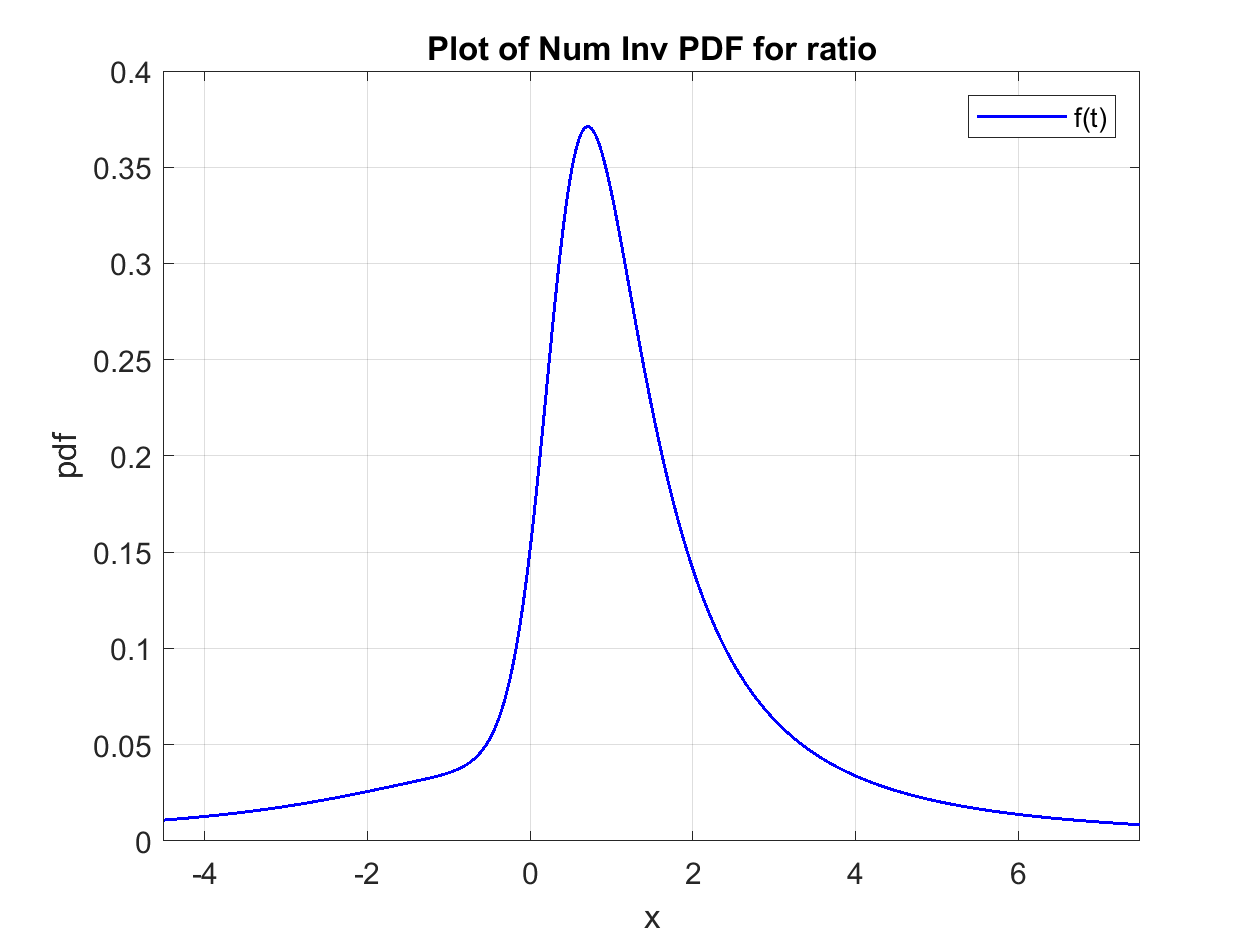

         Description: 'PDF of ratio X1/X2 from the char. functions'
     inversionMethod: 'Broda-Kan'
    quadratureMethod: 'Built-in 1D numerical integration https://www.mathworks.com/help/matlab/ref/integral.html'
          methodAbbr: 'BKB:SixSigma:SymDer:parCPU:1e-03'
        parallelCPUs: 8
                 cf1: @(t1)exp(1i*a*t1-t1.^2/2)
                 cf2: @(t2)exp(1i*b*t2-t2.^2/2)
      cf2derSymbolic: @(t2)(1i*b-t2).*exp(1i*b*t2-t2.^2/2)
                  xN: 1000
                   x: [1000x1 double]
                 pdf: [1000x1 double]
        SixSigmaRule: 6
                   N: 256
              t1_min: -44.5875
              t1_max: 44.7621
              t2_min: 1.0000e-15
              t2_max: 44.7566
                rtol: 1.0000e-03
             options: [1x1 struct]
             runtime: 3.7323
     runtimePerPoint: 0.0037
               error: 1.4520e-08



In [28]:
% num inversion of ratio
[result, Rpdfs] = cf_Ratio_BKB(cf1, cf2, x, options);
result.error = max(abs(Rpdf-SagePDF));
disp(result)

#### measuring runtime

In [29]:
% simple tic-toc method built-in the cf_Ratio_BKB.m
% Update the performance structure and display the result
performance = update_PerfStats(result, performance);

                                                                                                                             Performance statistics                                                                                                         
                    ________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

    method          {'[BKB:Infs:NumDer:1e-03, BKB:Infs:SymDer:1e-03, BKB:SixSigma:NumDer:1e-03, BKB:SixSigma:SymDer:1e-03, BKB:Infs:NumDer:parCPU:1e-03, BKB:Infs:SymDer:parCPU:1e-03, BKB:SixSigma:NumDer:parCPU:1e-03, BKB:SixSigma:SymDer:parCPU:1e-03]'}
    rt              {'[4.45e+01 1.52e+01 6.06e+01 2.30e+01 7.45e+00 2.45e+00 1.05e+01 3.73e+00]'                                                                                                                                                

# PDF via built-in analytic form

## AF - Marsaglia 2006
- Marsaglia, George. 2006. “Ratios of Normal Variables.” Journal of Statistical Software 16 (4). https://doi.org/10.18637/jss.v016.i04.


$$
f_T(t) = \frac{\exp\left(-\frac{a^2 + b^2}{2}\right)}{\pi (1 + t^2)}\left( 1 + q \exp\left(\frac{q^2}{2}\right) \int_0^q \exp\left(-\frac{x^2}{2}\right) \, dx \right), \quad q = \frac{b + a t}{\sqrt{1 + t^2}}
$$

In [30]:
% Define the function f_T for specific values
f_k = @(t) exp(-(a^2 + b^2)/2) / (pi * (1 + t.^2));
q = @(t) (b + a * t) / sqrt(1 + t.^2);

% Analytic version of PDF for f_T
fTM = @(t) f_k(t) .* (1 + q(t) .* exp(1/2 * q(t).^2) .* ...
    arrayfun(@(q_val) integral(@(x) exp(-1/2 * x.^2), 0, q_val), q(t)));

In [31]:
% Values of the function f_T for plot
%x1 = result.x;

tic;

fTM_values = arrayfun(fTM, x);

runtime = toc;

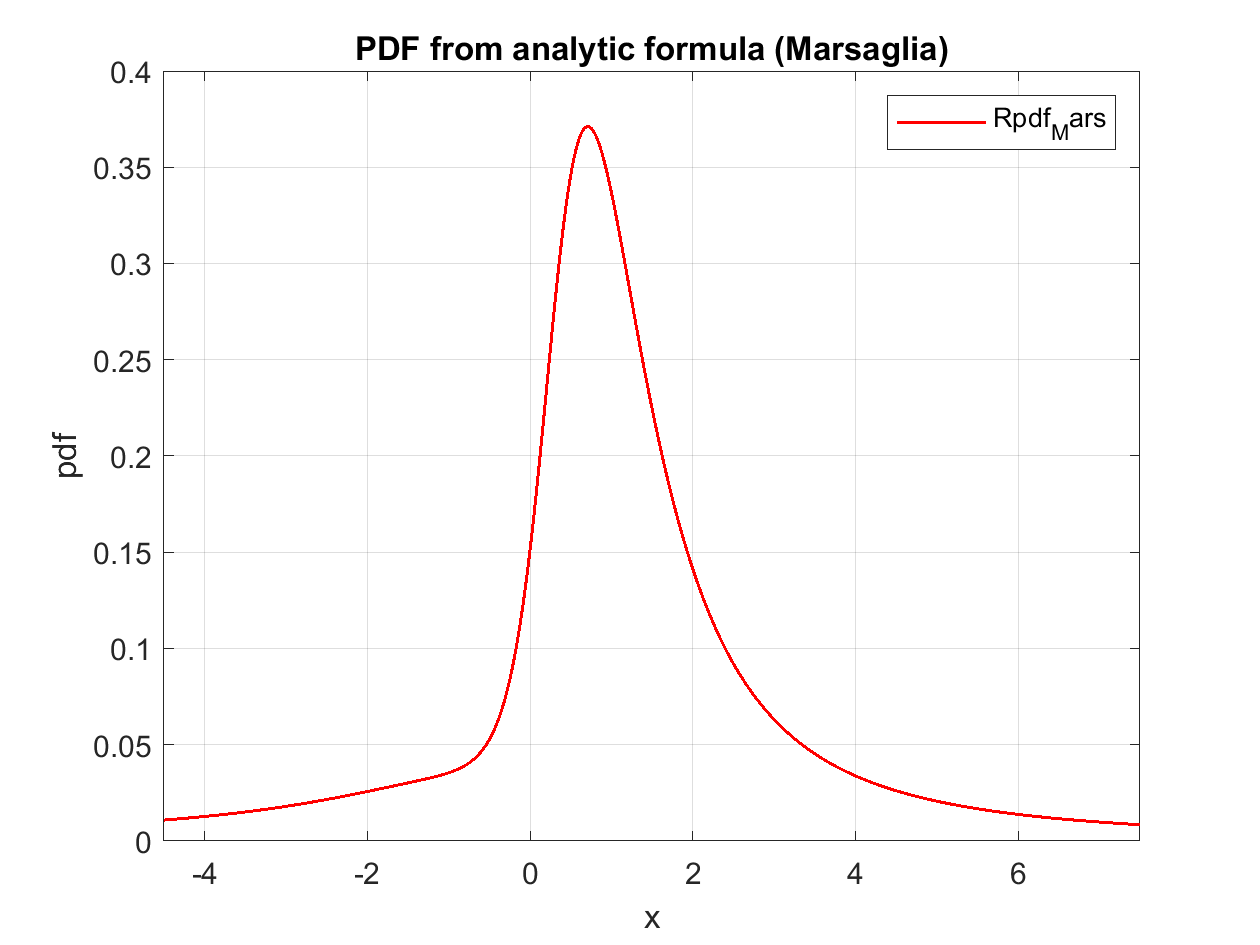

In [32]:
% Plot of PDF from analytic formula
figure
plot(x, fTM_values, 'r', 'LineWidth', 1);
xlim([min(x) max(x)]) % plot in  sigma range
grid on,
title('PDF from analytic formula (Marsaglia)')
xlabel('x')
ylabel('pdf')   
legend('Rpdf_Mars');

#### measuring time

In [33]:
% simple tic-toc method 
% saving measurement
result.runtime = runtime;
result.methodAbbr = 'AF-Mars';
result.xN = length(x);
resutl.error = max(abs(fTM_values-SagePDF));
% Update the performance structure and display the result
performance = update_PerfStats(result, performance);

                                                                                                                                 Performance statistics                                                                                                              
                    _________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

    method          {'[BKB:Infs:NumDer:1e-03, BKB:Infs:SymDer:1e-03, BKB:SixSigma:NumDer:1e-03, BKB:SixSigma:SymDer:1e-03, BKB:Infs:NumDer:parCPU:1e-03, BKB:Infs:SymDer:parCPU:1e-03, BKB:SixSigma:NumDer:parCPU:1e-03, BKB:SixSigma:SymDer:parCPU:1e-03, AF-Mars]'}
    rt              {'[4.45e+01 1.52e+01 6.06e+01 2.30e+01 7.45e+00 2.45e+00 1.05e+01 3.73e+00 3.75e-02]'                                                                                                            

## AF - Pham-Gia 2007
Pham-Gia 2007
- Pham-Gia, T., Turkkan, N., & Marchand, E. (2007). Density of the Ratio of Two Normal Random Variables and Applications. Communications in Statistics - Theory and Methods, 35(9), 1569–1591. https://doi.org/10.1080/03610920600683689

$$\left( 1 + q \exp\left(\frac{q^2}{2}\right) \int_0^q \exp\left(-\frac{x^2}{2}\right) \, dx \right)= {}_1F_1\left(\begin{array}{c}
1 \\
1 / 2
\end{array}; \frac{q^2}{2}\right)$$

$$
f_T(t) = \frac{\exp\left(-\frac{a^2 + b^2}{2}\right)}{\pi (1 + t^2)}{}_1F_1\left(\begin{array}{c}
1 \\
1 / 2
\end{array}; \frac{q^2}{2}\right), \quad q = \frac{b + a t}{\sqrt{1 + t^2}}
$$


In [34]:
% Define the function f_T for specific values
a = 1.5; b = 1;
f_k = @(t) exp(-(a^2 + b^2)/2) / (pi * (1 + t.^2));
q = @(t) (b + a * t) / sqrt(1 + t.^2);

% Define the function f_T for specific values
fTP = @(t) f_k(t) .* Hypergeom1F1(1,1/2, q(t).^2 / 2);

In [35]:
% Values of the function f_T for plot
tic;

fTP_values = arrayfun(fTP, x);

runtime = toc;

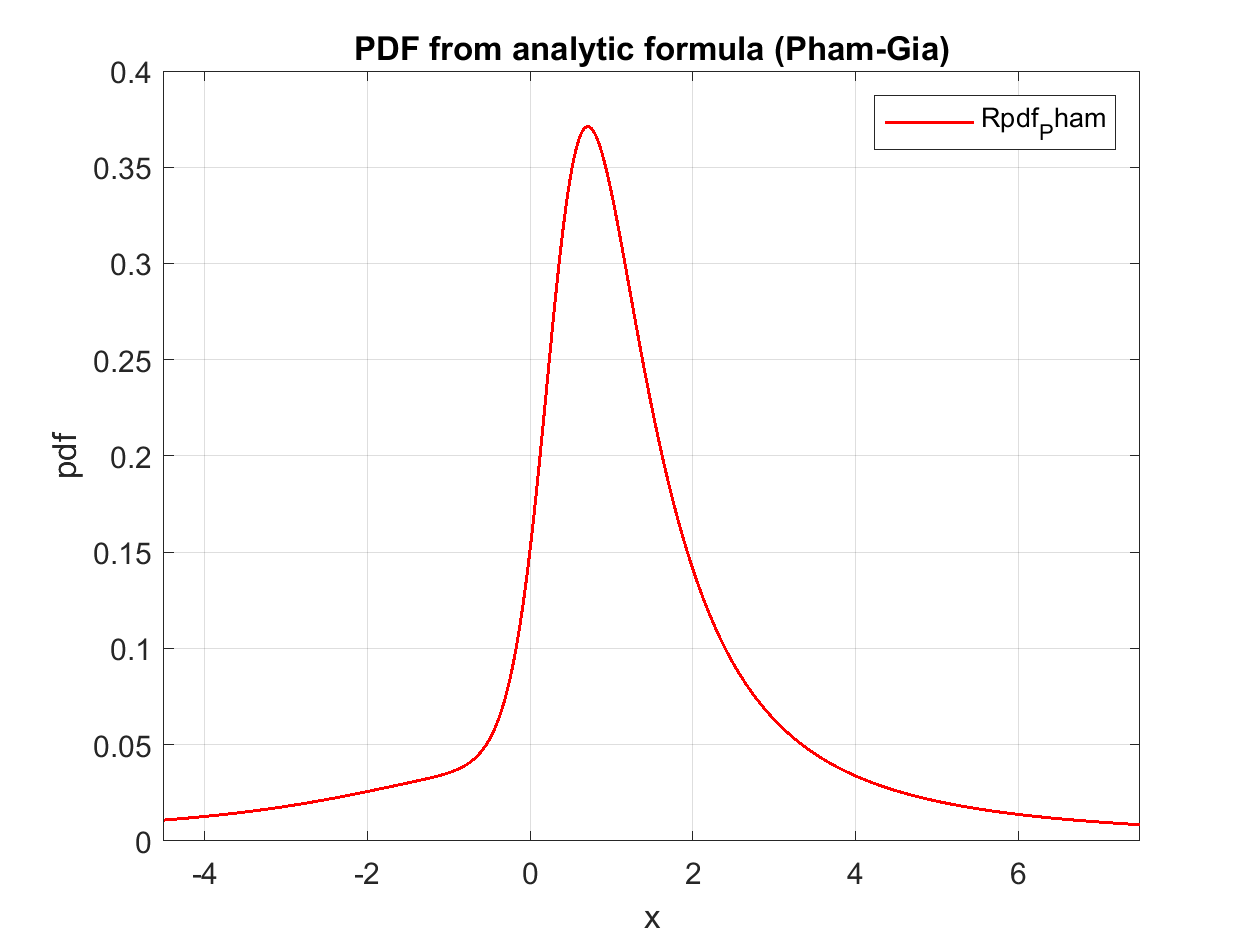

In [36]:
% Plot of PDF from analytic formula
figure
plot(x, fTP_values, 'r', 'LineWidth', 1);
xlim([min(x) max(x)]) % plot in  sigma range
grid on,
title('PDF from analytic formula (Pham-Gia)')
xlabel('x')
ylabel('pdf')   
legend('Rpdf_Pham');

#### measuring time

In [37]:
% simple tic-toc method 
% saving measurement
result.runtime = runtime;
result.methodAbbr = 'AF-Pham-Gia';
result.xN = length(x);
resutl.error = max(abs(fTM_values-SagePDF));
% Update the performance structure and display the result
performance = update_PerfStats(result, performance);

                                                                                                                                        Performance statistics                                                                                                                    
                    ______________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

    method          {'[BKB:Infs:NumDer:1e-03, BKB:Infs:SymDer:1e-03, BKB:SixSigma:NumDer:1e-03, BKB:SixSigma:SymDer:1e-03, BKB:Infs:NumDer:parCPU:1e-03, BKB:Infs:SymDer:parCPU:1e-03, BKB:SixSigma:NumDer:parCPU:1e-03, BKB:SixSigma:SymDer:parCPU:1e-03, AF-Mars, AF-Pham-Gia]'}
    rt              {'[4.45e+01 1.52e+01 6.06e+01 2.30e+01 7.45e+00 2.45e+00 1.05e+01 3.73e+00 3.75e-02 5.88e-03]'                                                            

# PDF via the fast vectorized integral sum
code `cf_Ratio_BK.m`

### BK TR + num. der. cf2

In [38]:
% N points in a default six sigma interval for X1
clear options;
options.isPlot = true;
options.xN = N;

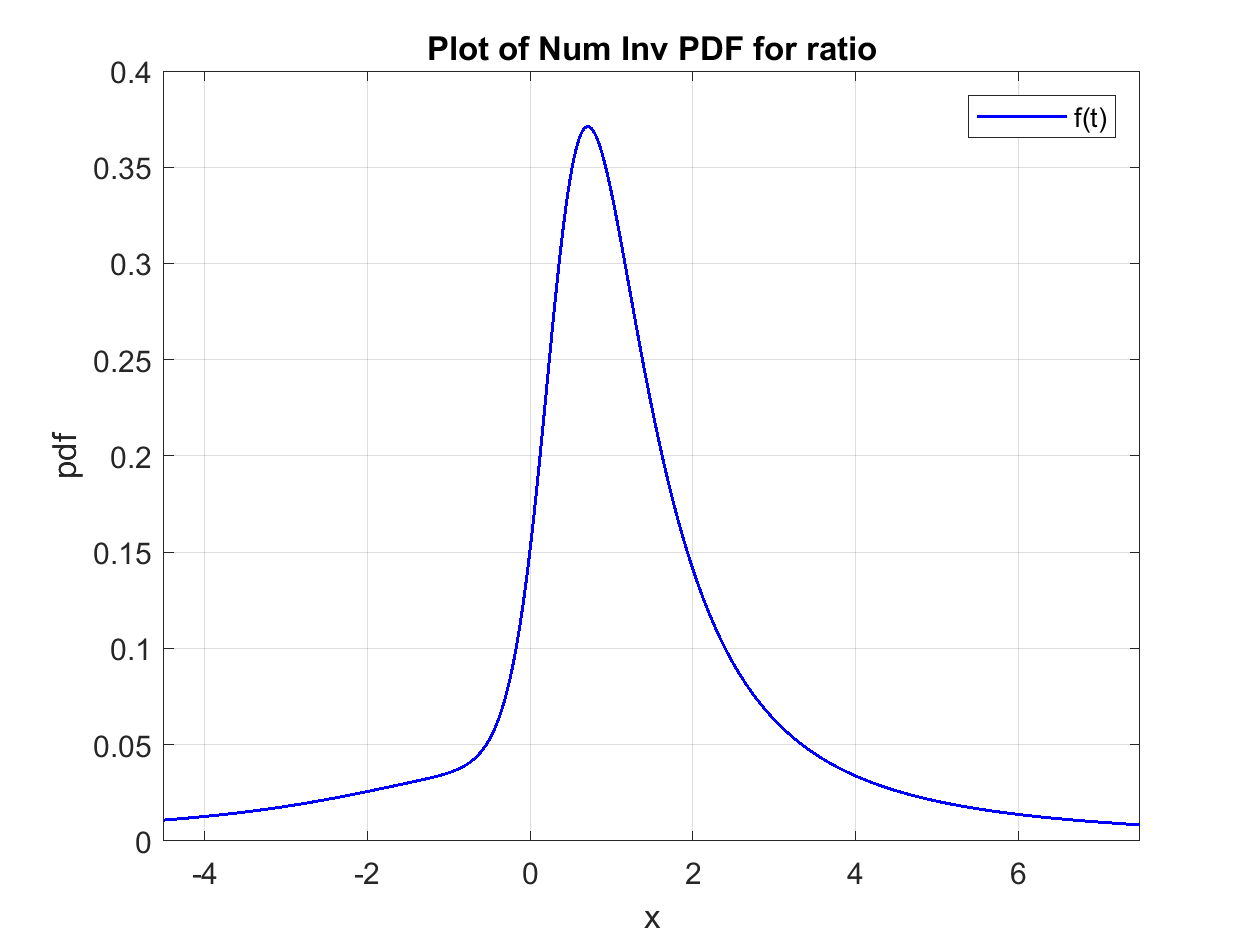

         Description: 'PDF of ratio X1/X2 from the char. functions'
     inversionMethod: 'Broda-Kan'
    quadratureMethod: 'Trapezoidal 2D quadrature'
          methodAbbr: 'BK:TR:NumDer'
                 cf1: @(t1)exp(1i*a*t1-t1.^2/2)
                 cf2: @(t2)exp(1i*b*t2-t2.^2/2)
      cf2derSymbolic: []
                  xN: 1000
                   x: [1000x1 double]
                 pdf: [1000x1 double]
        SixSigmaRule: 6
                   N: 256
                  dt: [0.1745 0.1745]
                   T: 0.0873
               xMean: [1.5000 1]
                xStd: [1.0000 1.0000]
                xMin: [-4.5000 -5.0000]
                xMax: [7.5000 7.0000]
             options: [1x1 struct]
             runtime: 0.7081
     runtimePerPoint: 7.0815e-04
               error: 1.0033e-04



In [39]:
% num inversion of ratio
[result, Rpdf] = cf_Ratio_BK(cf1, cf2, x, options);
result.error = max(abs(Rpdf-SagePDF));
disp(result)

#### measuring time

In [40]:
% simple tic-toc method built-in the cf_Ratio_BKB.m
% Update the performance structure and display the result
performance = update_PerfStats(result, performance);

                                                                                                                                               Performance statistics                                                                                                                           
                    ____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

    method          {'[BKB:Infs:NumDer:1e-03, BKB:Infs:SymDer:1e-03, BKB:SixSigma:NumDer:1e-03, BKB:SixSigma:SymDer:1e-03, BKB:Infs:NumDer:parCPU:1e-03, BKB:Infs:SymDer:parCPU:1e-03, BKB:SixSigma:NumDer:parCPU:1e-03, BKB:SixSigma:SymDer:parCPU:1e-03, AF-Mars, AF-Pham-Gia, BK:TR:NumDer]'}
    rt              {'[4.45e+01 1.52e+01 6.06e+01 2.30e+01 7.45e+00 2.45e+00 1.05e+01 3.73e+00 3.75e-02 5.88e-03 7.08e-01]'         

### BK TR + symb. der. cf2

In [41]:
% using symbolic derivative
options.cf2derSymbolic = cf2_dif;

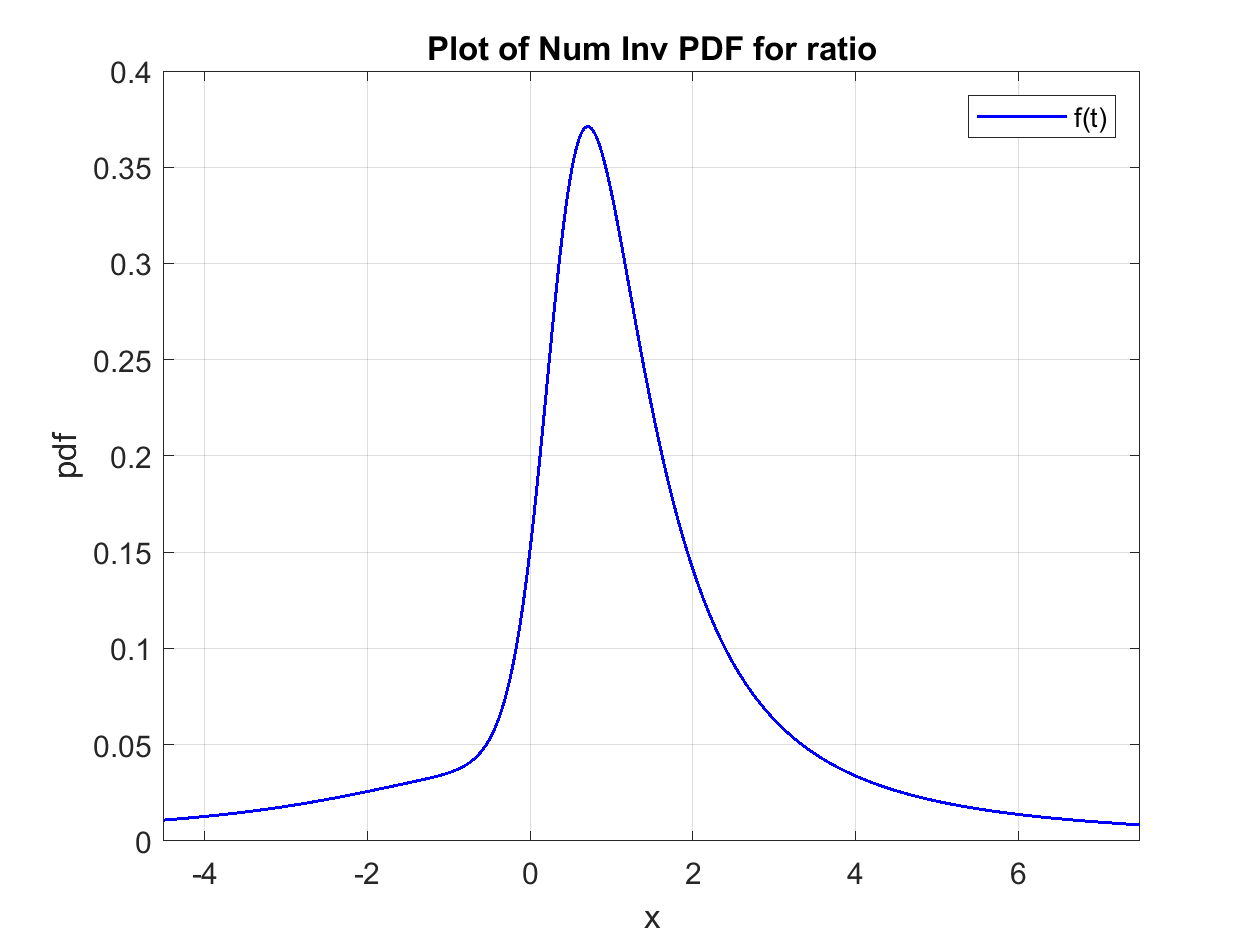

         Description: 'PDF of ratio X1/X2 from the char. functions'
     inversionMethod: 'Broda-Kan'
    quadratureMethod: 'Trapezoidal 2D quadrature'
          methodAbbr: 'BK:TR:SymDer'
                 cf1: @(t1)exp(1i*a*t1-t1.^2/2)
                 cf2: @(t2)exp(1i*b*t2-t2.^2/2)
      cf2derSymbolic: @(t2)(1i*b-t2).*exp(1i*b*t2-t2.^2/2)
                  xN: 1000
                   x: [1000x1 double]
                 pdf: [1000x1 double]
        SixSigmaRule: 6
                   N: 256
                  dt: [0.1745 0.1745]
                   T: 0.0873
               xMean: [1.5000 1]
                xStd: [1.0000 1.0000]
                xMin: [-4.5000 -5.0000]
                xMax: [7.5000 7.0000]
             options: [1x1 struct]
             runtime: 0.1855
     runtimePerPoint: 1.8551e-04
               error: 1.0033e-04



In [42]:
% num inversion of ratio
[result, Rpdf] = cf_Ratio_BK(cf1, cf2, x, options);
result.error = max(abs(Rpdf-SagePDF));
disp(result)

#### measuring runtime

In [43]:
% simple tic-toc method built-in the cf_Ratio_BKB.m
% Update the performance structure and display the result
performance = update_PerfStats(result, performance);

                                                                                                                                                      Performance statistics                                                                                                                                  
                    __________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

    method          {'[BKB:Infs:NumDer:1e-03, BKB:Infs:SymDer:1e-03, BKB:SixSigma:NumDer:1e-03, BKB:SixSigma:SymDer:1e-03, BKB:Infs:NumDer:parCPU:1e-03, BKB:Infs:SymDer:parCPU:1e-03, BKB:SixSigma:NumDer:parCPU:1e-03, BKB:SixSigma:SymDer:parCPU:1e-03, AF-Mars, AF-Pham-Gia, BK:TR:NumDer, BK:TR:SymDer]'}
    rt              {'[4.45e+01 1.52e+01 6.06e+01 2.30e+01 7.45e+00 2.45e+00 1.05e+01 3.73

### BK CC quadrature + num. der. cf2

In [44]:
% N points in six sigma interval for X1
clear options;
options.isPlot = true;
%options.chebyPts = 2^10+1;
options.cf2derSymbolic = [];
options.isInterp = true;

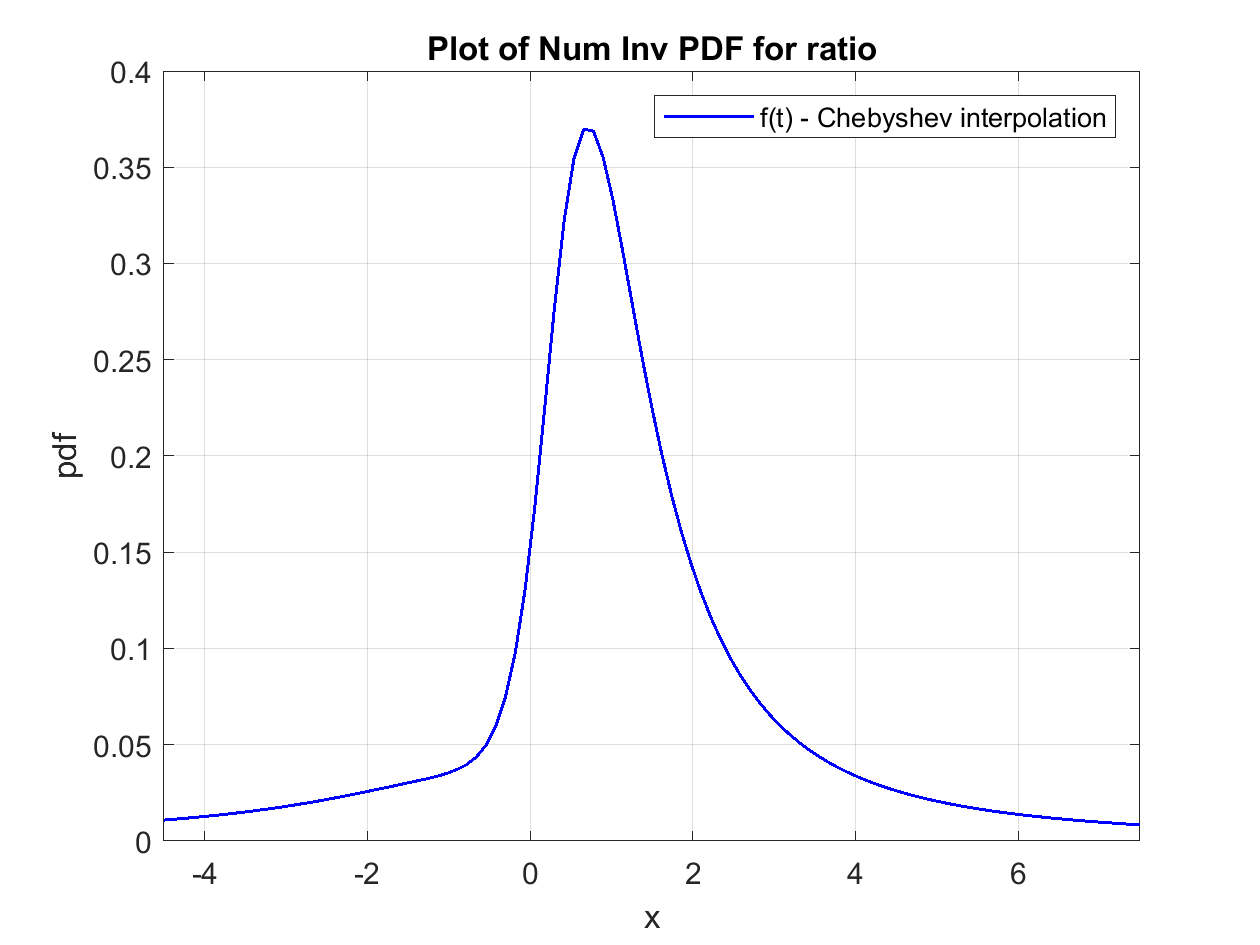

         Description: 'PDF of ratio X1/X2 from the char. functions'
     inversionMethod: 'Broda-Kan'
    quadratureMethod: 'Clenshaw-Curtis 2D quadrature'
          methodAbbr: 'BK:CC:NumDer'
                 cf1: @(t1)exp(1i*a*t1-t1.^2/2)
                 cf2: @(t2)exp(1i*b*t2-t2.^2/2)
      cf2derSymbolic: []
                  xN: 65
                   x: [65x1 double]
                 pdf: [65x1 double]
                 PDF: @(x1new)InterpPDF(x1new,x1,Rpdf)
        SixSigmaRule: 6
                   N: 256
                  dt: [0.1745 0.1745]
                   T: 0.0873
               xMean: [1.5000 1]
                xStd: [1.0000 1.0000]
                xMin: [-4.5000 -5.0000]
                xMax: [7.5000 7.0000]
             options: [1x1 struct]
             runtime: 0.0470
     runtimePerPoint: 7.2361e-04



In [45]:
% num inversion of ratio
[result, Rpdf] = cf_Ratio_BK(cf1, cf2, [], options);
%result.error = max(abs(Rpdf-SagePDF));
disp(result)

In [46]:
%calculation CC quadrature
runtime = result.runtime;
xN = result.xN;

timeVal = tic;
Rpdfc = result.PDF(x);
tictoc = toc(timeVal);
result.runtime = runtime + tictoc;
result.error = max(abs(Rpdfc-SagePDF));
result.xN = N;

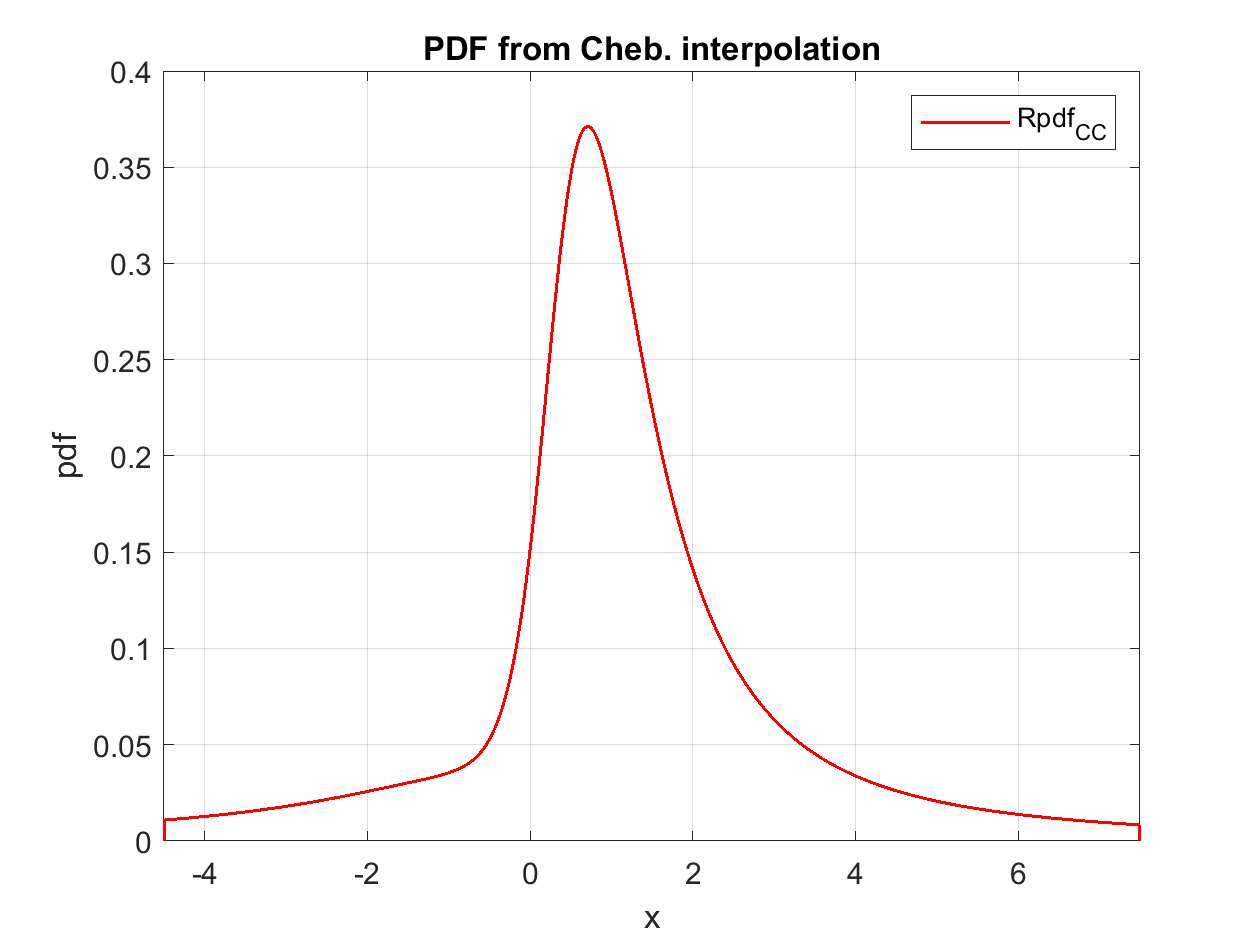

In [47]:
%PDF from Cheb interpolation vs. from Cheb points
figure
plot(x, Rpdfc, 'r', 'LineWidth', 1);
xlim([min(x) max(x)]) % plot in  sigma range
grid on;
title('PDF from Cheb. interpolation')
xlabel('x')
ylabel('pdf')   
legend('Rpdf_C_C');

#### measuring time

In [48]:
% simple tic-toc method 
% Update the performance structure and display the result
performance = update_PerfStats(result, performance);

                                                                                                                                                             Performance statistics                                                                                                                                         
                    ________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

    method          {'[BKB:Infs:NumDer:1e-03, BKB:Infs:SymDer:1e-03, BKB:SixSigma:NumDer:1e-03, BKB:SixSigma:SymDer:1e-03, BKB:Infs:NumDer:parCPU:1e-03, BKB:Infs:SymDer:parCPU:1e-03, BKB:SixSigma:NumDer:parCPU:1e-03, BKB:SixSigma:SymDer:parCPU:1e-03, AF-Mars, AF-Pham-Gia, BK:TR:NumDer, BK:TR:SymDer, BK:CC:NumDer]'}
    rt              {'[4.45e+01 1.52e+01 6.06e+0

### BK CC quadrature + sym. der. cf2

In [49]:
% N points in six sigma interval for X1
options.cf2derSymbolic = cf2_dif;

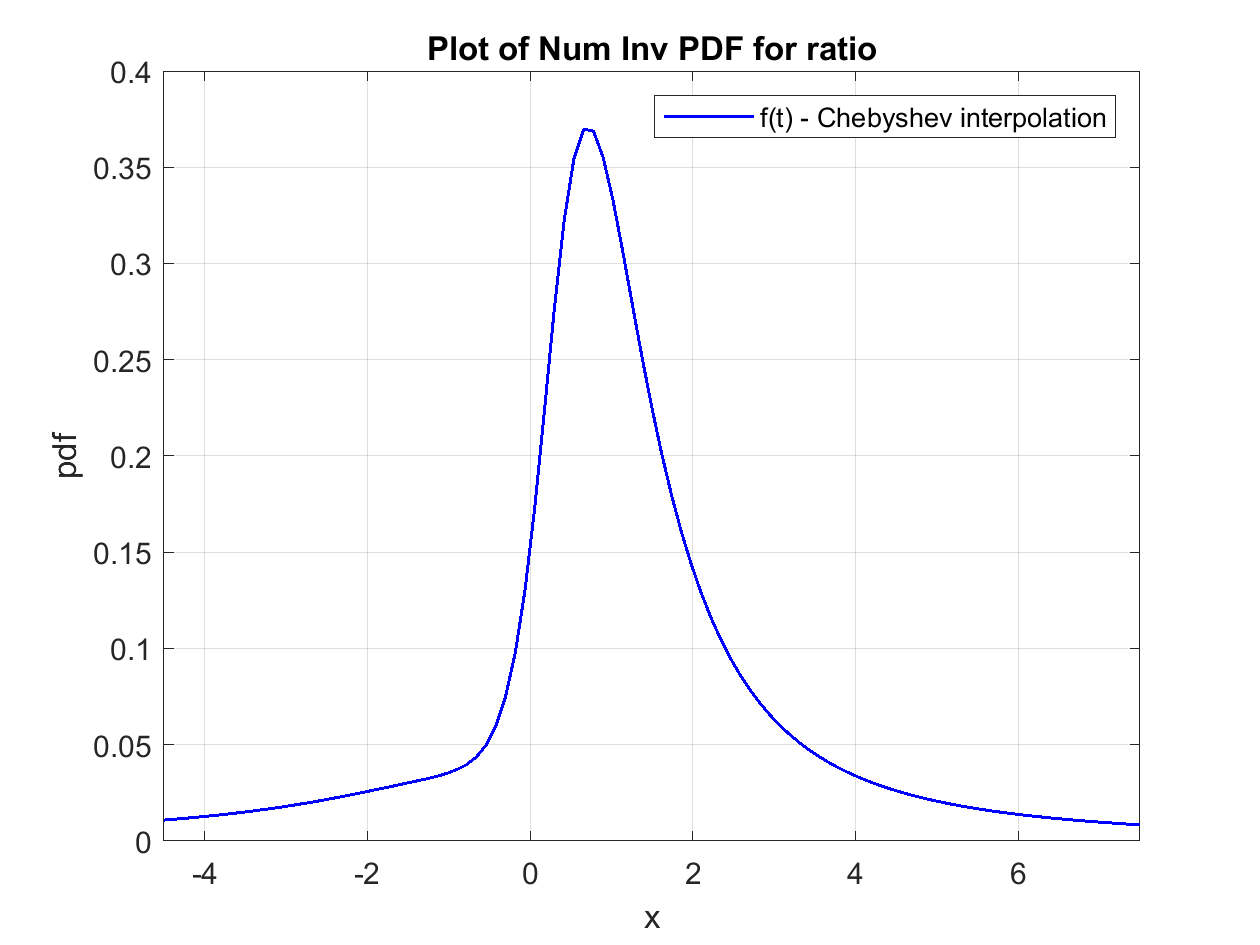

         Description: 'PDF of ratio X1/X2 from the char. functions'
     inversionMethod: 'Broda-Kan'
    quadratureMethod: 'Clenshaw-Curtis 2D quadrature'
          methodAbbr: 'BK:CC:SymDer'
                 cf1: @(t1)exp(1i*a*t1-t1.^2/2)
                 cf2: @(t2)exp(1i*b*t2-t2.^2/2)
      cf2derSymbolic: @(t2)(1i*b-t2).*exp(1i*b*t2-t2.^2/2)
                  xN: 65
                   x: [65x1 double]
                 pdf: [65x1 double]
                 PDF: @(x1new)InterpPDF(x1new,x1,Rpdf)
        SixSigmaRule: 6
                   N: 256
                  dt: [0.1745 0.1745]
                   T: 0.0873
               xMean: [1.5000 1]
                xStd: [1.0000 1.0000]
                xMin: [-4.5000 -5.0000]
                xMax: [7.5000 7.0000]
             options: [1x1 struct]
             runtime: 0.0140
     runtimePerPoint: 2.1502e-04



In [50]:
% num inversion of ratio
[result, Rpdf] = cf_Ratio_BK(cf1, cf2, [], options);
%result.error = max(abs(Rpdf-SagePDF));
disp(result)

In [51]:
%calculation CC quadrature
runtime = result.runtime;
xN = result.xN;
timeVal = tic;
Rpdfc = result.PDF(x);
tictoc = toc(timeVal);
result.runtime = runtime + tictoc;
result.error = max(abs(Rpdfc-SagePDF));
result.xN = N;

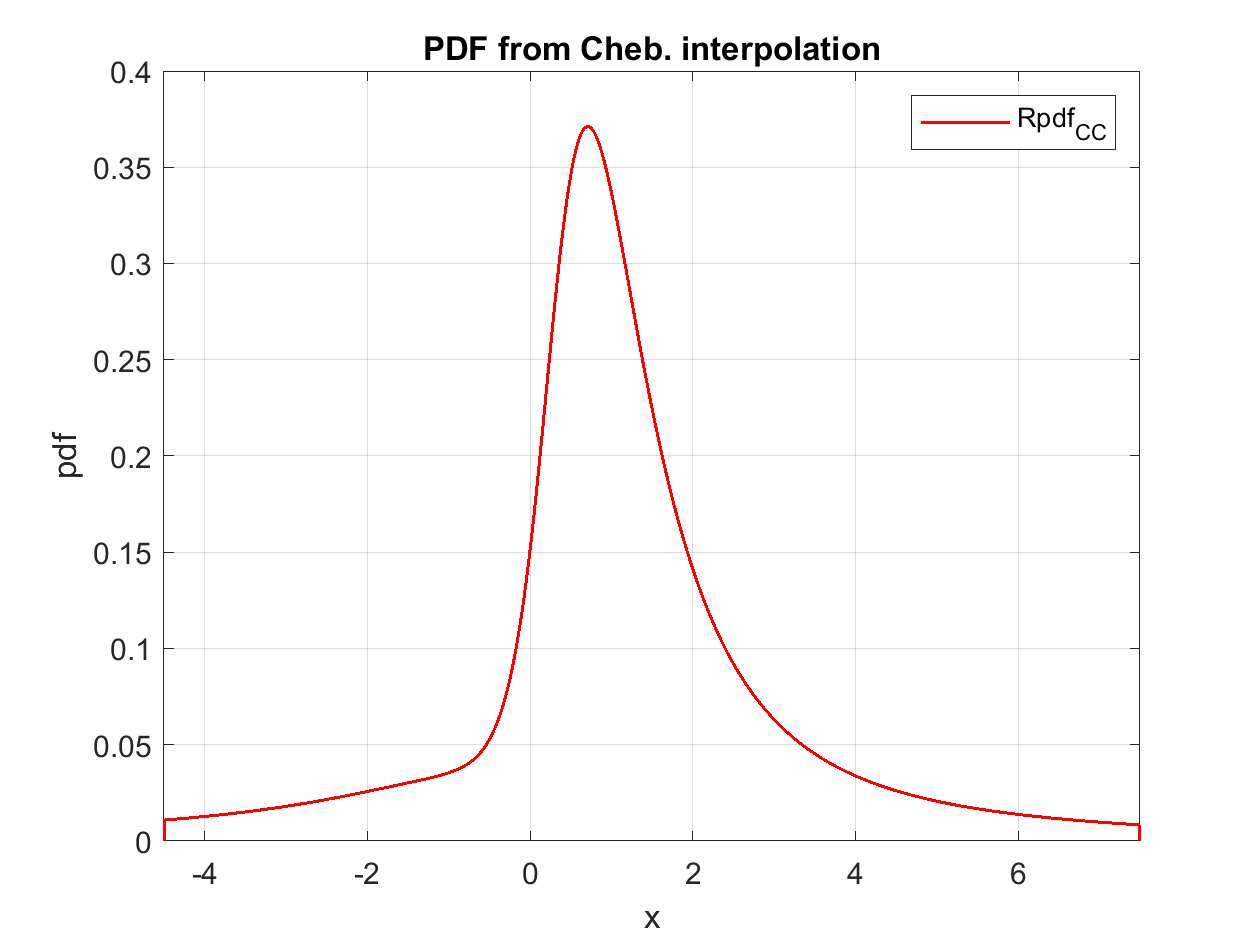

In [52]:
%PDF from Cheb interpolation vs. from Cheb points
figure
plot(x, Rpdfc, 'r', 'LineWidth', 1);
xlim([min(x) max(x)]) % plot in  sigma range
grid on;
title('PDF from Cheb. interpolation')
xlabel('x')
ylabel('pdf')   
legend('Rpdf_C_C');

#### measuring time

In [53]:
% simple tic-toc method 
% Update the performance structure and display the result
performance = update_PerfStats(result, performance);

                                                                                                                                                                    Performance statistics                                                                                                                                                
                    ______________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

    method          {'[BKB:Infs:NumDer:1e-03, BKB:Infs:SymDer:1e-03, BKB:SixSigma:NumDer:1e-03, BKB:SixSigma:SymDer:1e-03, BKB:Infs:NumDer:parCPU:1e-03, BKB:Infs:SymDer:parCPU:1e-03, BKB:SixSigma:NumDer:parCPU:1e-03, BKB:SixSigma:SymDer:parCPU:1e-03, AF-Mars, AF-Pham-Gia, BK:TR:NumDer, BK:TR:SymDer, BK:CC:NumDer, BK:CC:SymDer]'}
    rt

# SAVING results

In [28]:
% setting folder for a xlsx file
pwd;
folderPath = 'd:\Dropbox\00 Jupyter\00 Matematika\Probastat\data\MathematicaMATLAB\';

% Get the current date and time in a suitable format (e.g., YYYY-MM-DD-HH-MM-SS)
currentDateTime = datestr(now, 'yyyy_mm-dd-HH_MM_SS');

% Create the filename with N and date-time
fileName = sprintf('MTB-perfStats-N%d-%s.xlsx', N, currentDateTime);

% Convert performance data structure to a table
perfTable = struct2table(performance);
filePath = fullfile(folderPath, fileName)

% Save as an Excel file
writetable(perfTable,filePath);

filePath = 'd:\Dropbox\00 Jupyter\00 Matematika\Probastat\data\MathematicaMATLAB\MTB-perfStats-N1000-2024_11-19-03_46_11.xlsx'

### BK CC quadrature + sym. der. cf2 (variability)

In [35]:
% Initialize the structure to store performance data for methods
performance.method = {}; % method of calculation
performance.rt = []; % runtime
performance.rtPerPoint = []; % runtime per point
performance.acceleration = []; % acceleration
performance.error = []; % max error

In [36]:
% N points in six sigma interval for X1
clear options;
options.isPlot = false;
%options.chebyPts = 2^10+1;
options.cf2derSymbolic = cf2_dif;
options.isInterp = true;
%options.parallelCPU = true;

#### measuring time

In [49]:
% num inversion of ratio
[result, Rpdf] = cf_Ratio_BK(cf1, cf2, [], options);
%result.error = max(abs(Rpdf-SagePDF));
%disp(result)

%calculation CC quadrature
runtime = result.runtime;
xN = result.xN;
timeVal = tic;
Rpdfc = result.PDF(x);
tictoc = toc(timeVal);
result.runtime = runtime + tictoc;
result.error = max(abs(Rpdfc-SagePDF));
result.xN = N;

% simple tic-toc method 
% Update the performance structure and display the result
performance = update_PerfStats(result, performance);

                                                                                                                                      Performance statistics                                                                                                                   
                    ___________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

    method          {'[BK:TR:CC65:SymDer, BK:TR:CC65:SymDer, BK:TR:CC65:SymDer, BK:TR:CC65:SymDer, BK:TR:CC65:SymDer, BK:TR:CC65:SymDer, BK:TR:CC65:SymDer, BK:TR:CC65:SymDer, BK:TR:CC65:SymDer, BK:TR:CC65:SymDer, BK:TR:CC65:SymDer, BK:TR:CC65:SymDer, BK:TR:CC65:SymDer]'}
    rt              {'[1.69e-02 1.69e-02 1.71e-02 1.87e-02 1.66e-02 1.66e-02 1.71e-02 1.63e-02 1.61e-02 1.90e-02 1.60e-02 1.70e-02 1.63e-02]'                                          